# Importing the Data

In [200]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
data = pd.read_csv('/Users/Parzon/Downloads/SUPPORT2_ML/Support2_ML/Untitled/support2.csv')

In [202]:
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    elif df[column].nunique() >= 10:
         mean = df[column].mean() # mean
         std_dev = df[column].std() # standard deviation
         # Calculate interquartile range (IQR)
         q1 = df[column].quantile(0.25)
         q3 = df[column].quantile(0.75)
         iqr = q3 - q1 # interquartile range
         outlier_range = (q1 - 3*iqr, q3 + 3*iqr) # outlier range is 3 times of IQR
         outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
         outliers = outliers[column].values # outlier values

         print(f"Mean of {column}: {mean:.2f}")
         print(f"Standard deviation of {column}: {std_dev:.2f}")
         print(f"Number of outliers in {column}: {len(outliers)}")
         print("Outliers values:")
         print(outliers)

         plt.figure(figsize=(8, 6))
         sns.boxplot(data=df, x=column)
         plt.title(f"Box plot of {column}") # Box plot
         
         plt.figure(figsize=(8, 6))
         sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
         plt.title(f"Histogram of {column}")
         plt.show()
    else:
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True) # Histogram
        plt.title(f"Histogram of {column}")
        plt.show()

In [203]:
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

# Research Questions

**Mortality Period Comparison:**

RQ1: How accurately can the survival of patients (either 2 months or 6 months) be classified from the predictions made from the SUPPORT2 model in comparison to the physicians predictions, from the features in the dataset, and which of these features are the most indicative of mortality?


**Length of Stay Prediction:**

RQ2: Can the length of stay (slos column) be accurately predicted based on the initial medical readings, and how do specific medical conditions (dzgroup or dzclass) correlate with longer stays?


**Medical Expenditure Analysis:**

RQ3: Can a model be developed to predict total charges (charges column), and how do different medical conditions impact the total medical costs (totcst and totmcst columns)?


**Disease Classification:**

RQ4: Can patients be accurately classified into specific disease groups (dzgroup or dzclass), and how does this classification compare to existing clinical classifications?


**Mortality Outcome Analysis:**

RQ5: Can the probability of a patient's survival (death) be predicted based on their medical records?


**Patient Demographics and Outcomes:**

RQ6: How do demographics like sex, edu, income, and race correlate with medical outcomes or medical charges within the dataset constraints, and are there specific demographic groups at higher risk of certain conditions?

# Data Dictionary

age: Age of the individual.

death: Indicator if death occurred (binary).

sex: Gender of the individual.

hospdead: Hospital death indicator (binary).

slos: Hospital stay length in days.

d.time: Days from ICU admission to death or last follow-up.

dzgroup: Diagnostic group.

dzclass: Diagnostic class.

num.co: Number of complications.

edu: Highest education level attained.

income: Income category of the individual.

scoma: Glasgow coma scale score.

charges: Total charges.

totcst: Total cost.

totmcst: Total Medicaid cost.

avtisst: Average total illness severity score.

race: Race of the individual.

sps: SUPPORT physiology score on day 3 (predicted by a model).

aps: APACHE III day 3 physiology score (no coma, imp bun,uout for ph1)

surv2m: SUPPORT model 2-month survival estimate at day 3 (predicted by a model)

surv6m: SUPPORT model 6-month survival estimate at day 3 (predicted by a model)

hday: Hospital day of ICU admission.

diabetes: Indicator for diabetes (binary).

dementia: Indicator for dementia (binary).

ca: Cancer type. Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).

prg2m: Physician’s 2-month survival estimate for patient.

prg6m: Physician’s 6-month survival estimate for patient.

dnr: Do-Not-Resuscitate status.

dnrday: Day of DNR order since ICU admission.

meanbp: Mean blood pressure.

wblc: White blood cell count.

hrt: Heart rate.

resp: Respiratory rate.

temp: Body temperature.

pafi: PaO2/FiO2 ratio (lung disease severity).

alb: Albumin levels (liver or kidney function).

bili: Bilirubin levels (liver function).

crea: Creatinine levels (kidney function).

sod: Blood sodium levels.

ph: Blood pH level (acid-base balance).

glucose: Blood glucose level.

bun: Blood Urea Nitrogen level (kidney function).

urine: Urine output (kidney function).

adlp: Index of Activities of Daily Living (ADL) of the patient, filled out by the patient. Higher values indicate more chance of survival, measured at day 3.

adls: Index of Activities of Daily Living (ADL) of the patient, filled out by a surrogate (e.g. family member), measured at day 3. Higher values indicate more chance of survival.

sfdm2: Survival function to 2 months.

adlsc: Activities of daily living scale composite.

# SUPPORT2 Dataset Overview

## General Information
- **Dataset Link**: [UCI Machine Learning Repository](https://doi.org/10.3886/ICPSR02957.v2)
- **Dataset Creator**: Frank Harrel
- **Affiliation**: Department of Biostatistics, Vanderbilt University

## Dataset Details
- **Number of Instances**: 9105
- **Number of Features**: 47
- **Subject Area**: Life Science
- **Associated Tasks**: Classification, Regression, Other
- **Time Range**: Accessioned in 1989-1991 (Phase I) and 1992-1994 (Phase II)
- **Funding**: Robert Wood Johnson Foundation

## Dataset Purpose
This dataset was created to estimate 180-day survival for seriously ill hospitalized adults and to compare model predictions with existing systems and physician estimates.

## Dataset Sensitivity
Contains information on race, gender, income, and education level.

## Additional Dataset Info
- **Data Sources**: Medical records, personal interviews, and the National Death Index (NDI).
- **Missing Values**: There are recommended imputation values for certain variables, with details available [here](https://hbiostat.org/data/repo/supportdesc). 
- **Introductory Paper**: [A controlled trial to improve care for seriously ill hospitalized patients](https://jamanetwork.com/journals/jama/fullarticle/409171).
- To develop models without using findings from previous models, be sure not to use aps, sps, surv2m, surv6m as predictors. You also will probably not want to use prg2m, prg6m, dnr, dnrday.


## Additional Variable Information
sps	- SUPPORT day 3 physiology score

aps	- APACHE III day 3 physiology score

surv2m - SUPPORT model 2-month survival estimate

surv6m - SUPPORT model 6-month survival estimate

hday - Day in hospital at which patient entered study

diabetes - Diabetes as a comorbidity

dementia - Dementia as a comorbidity

dnrday - Day of DNR order (<0 if before study)


## Normal Values for Imputation

**You may want to use the following normal values that have been found to be satisfactory in imputing missing baseline physiologic data:**

**Baseline Variable | Normal Fill-in Value**

Serum albumin - 3.5 (done)

PaO2/FiO2 ratio (pafi)-333.3 (done)

Bilirubin-1.01 (done)

Creatinine-1.01 (done)

BUN-6.51 (done)

White blood count-9(thousands) (done)

Urine output-2502 (done)

## sfdm2 levels
**The ordinal functional disability variable sfdm2 has the following levels (in order):**

**Level | Meaning**

1	- Patient lived 2 months to be able to get 2 month interview, and from this interview there were no signs of moderate to severe functional disability

2	- Patient was unable to do 4 or more activities of daily living at month 2 after study entry. If the patient was not interviewed but the patient’s surrogate was, the cutoff for disability was ADL 5

3	- Sickness Impact Profile total score at 2 months or equal to 30

4	- Patient intubated or in coma

5	- Patient died before 2 months after study entry

There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.



In [204]:
og_data = data.copy()

In [205]:
#dropping not predictors 
del data['aps']
del data['sps']
del data['surv2m']
del data['surv6m']
del data['prg2m']
del data['prg6m']
del data['dnr']
del data['dnrday']

# Metadata

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9083 entries, 1 to 9105
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9083 non-null   float64
 1   death     9083 non-null   int64  
 2   sex       9083 non-null   object 
 3   hospdead  9083 non-null   int64  
 4   slos      9083 non-null   int64  
 5   d.time    9083 non-null   int64  
 6   dzgroup   9083 non-null   object 
 7   dzclass   9083 non-null   object 
 8   num.co    9083 non-null   int64  
 9   edu       9083 non-null   float64
 10  income    9083 non-null   object 
 11  scoma     9083 non-null   float64
 12  charges   9083 non-null   float64
 13  totcst    9083 non-null   float64
 14  totmcst   5611 non-null   float64
 15  avtisst   9083 non-null   float64
 16  race      9083 non-null   object 
 17  hday      9083 non-null   int64  
 18  diabetes  9083 non-null   int64  
 19  dementia  9083 non-null   int64  
 20  ca        9083 non-null   object 
 

In [389]:
metadata(data)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,age,float64,0,0.00,7311,80.49,18.041990,1.018480e+02,15.601923
1,death,int64,0,0.00,2,0.02,0.000000,1.000000e+00,0.466009
2,sex,object,0,0.00,2,0.02,NaN,NaN,NaN
3,hospdead,int64,0,0.00,2,0.02,0.000000,1.000000e+00,0.438201
4,slos,int64,0,0.00,167,1.84,3.000000,3.430000e+02,22.012456
5,d.time,int64,0,0.00,1724,18.98,3.000000,2.029000e+03,560.791226
6,dzgroup,object,0,0.00,8,0.09,NaN,NaN,NaN
7,dzclass,object,0,0.00,4,0.04,NaN,NaN,NaN
8,num.co,int64,0,0.00,10,0.11,0.000000,9.000000e+00,1.344035
9,edu,float64,0,0.00,31,0.34,0.000000,3.100000e+01,3.126725


In [207]:
#dropping one row with scoma is null
data[(data['meanbp'].isnull())]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5441,55.52597,1,female,0,47,56,ARF/MOSF w/Sepsis,ARF/MOSF,2,12.0,NaN,0.0,92466.0,NaN,NaN,26.25,white,1,1,0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,<2 mo. follow-up,7.0


In [208]:
data.shape

(9105, 39)

In [209]:
data[data.isnull().sum(axis=1)==10]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,3,0,0,no,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.000000
9,85.65594,1,male,0,12,63,Lung Cancer,Cancer,2,12.0,NaN,26.0,NaN,NaN,NaN,8.500000,black,1,0,1,metastatic,97.0,9.699219,56.0,20.0,36.59375,357.12500,NaN,0.399963,1.000000,143.0,7.449219,NaN,NaN,NaN,NaN,7.0,NaN,7.000000
12,59.20099,1,male,1,13,13,Lung Cancer,Cancer,0,14.0,NaN,0.0,29388.0,NaN,NaN,8.000000,white,1,0,0,metastatic,77.0,10.798828,90.0,22.0,36.39844,NaN,NaN,NaN,1.099854,136.0,NaN,NaN,NaN,NaN,1.0,1.0,<2 mo. follow-up,1.000000
15,43.53998,0,female,0,115,2022,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,706577.0,390460.5000,NaN,38.250000,white,148,0,0,no,67.0,24.597656,172.0,20.0,38.79688,113.32812,NaN,NaN,0.599976,134.0,7.399414,NaN,NaN,NaN,NaN,NaN,SIP>=30,2.764160
59,72.55896,1,female,1,4,4,COPD,COPD/CHF/Cirrhosis,3,NaN,NaN,0.0,4894.0,3078.6016,NaN,6.000000,white,1,0,0,metastatic,123.0,13.298828,98.0,32.0,37.19531,144.87500,NaN,NaN,0.500000,136.0,7.339844,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,3.955078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8538,79.33698,1,female,0,7,8,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,under $11k,44.0,31978.0,20569.3281,20135.62500,25.000000,white,8,0,0,no,69.0,NaN,79.0,16.0,35.89844,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,7.0,<2 mo. follow-up,7.000000
8697,58.18500,0,female,0,21,820,Coma,Coma,0,12.0,>$50k,44.0,28158.0,20724.0938,20050.79690,21.000000,white,1,0,0,no,77.0,NaN,96.0,22.0,37.59375,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,0.0,no(M2 and SIP pres),0.000000
8886,69.59296,1,male,0,5,103,Colon Cancer,Cancer,1,8.0,under $11k,0.0,2545.0,1613.3086,1731.61914,13.000000,white,1,0,0,metastatic,111.0,NaN,62.0,16.0,36.39844,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,0.0,NaN,no(M2 and SIP pres),0.494751
9088,75.50696,0,male,0,23,364,COPD,COPD/CHF/Cirrhosis,1,13.0,$11-$25k,41.0,45129.0,30240.5156,37300.84380,34.000000,white,1,0,0,no,102.0,NaN,71.0,24.0,35.89844,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,0.0,no(M2 and SIP pres),0.000000


In [210]:
#number of missing features in each row 
missing = data.isnull().sum(axis=1).value_counts().sort_index()
missing

0      342
1      780
2      848
3     1083
4     1229
5     1274
6     1182
7      883
8      657
9      388
10     228
11     118
12      64
13      24
14       4
18       1
Name: count, dtype: int64

In [211]:
data = data.dropna(subset=['meanbp'])

In [212]:
data.describe()


,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,hday,diabetes,dementia,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,9104.000000,7470.000000,9103.000000,8.932000e+03,8217.000000,5630.000000,9022.000000,9104.000000,9104.000000,9104.000000,9104.000000,8893.000000,9104.000000,9104.000000,9104.000000,6780.000000,5733.000000,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6237.000000,9104.000000
mean,62.651606,0.681019,0.259227,17.859842,478.496265,1.868629,11.747657,12.059870,5.999215e+04,30825.867768,28828.877838,22.610525,4.400373,0.195189,0.032513,84.546408,12.347677,97.156711,23.330294,37.103341,239.529070,2.950520,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.636524,1.887710
std,15.594388,0.466107,0.438234,22.005530,560.396558,1.344482,3.447973,24.637723,1.026539e+05,45780.820986,43604.261932,13.233926,9.127243,0.396368,0.177368,27.687692,9.266329,31.559292,9.573801,1.251796,109.665593,0.875944,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.230503,2.003156
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.795497,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.738000e+03,5929.566400,5177.404300,12.000000,1.000000,0.000000,0.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.399902,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.858490,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.501950e+04,14452.734400,13223.500000,19.500000,1.000000,0.000000,0.000000,77.000000,10.599609,100.000000,24.000000,36.695310,224.000000,2.899902,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,74.000213,1.000000,1.000000,20.000000,761.250000,3.000000,14.000000,9.000000,6.458823e+04,36087.937500,34223.601600,31.666656,3.000000,0.000000,0.000000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,148.000000,1.000000,1.000000,195.000000,200.000000,300.000000,90.000000,41.695310,890.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [213]:
data.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,1,0,0,metastatic,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,3,0,0,no,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,4,0,0,no,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,1,0,0,metastatic,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,3,0,0,no,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [214]:
data[data.duplicated()].value_counts().sum()

0

In [215]:
data[(data['death']==1)&(data['hospdead']==1)]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,3,0,0,no,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
6,93.01599,1,male,1,4,4,Coma,Coma,1,14.0,NaN,55.0,6884.0,NaN,NaN,5.000000,white,1,0,0,no,110.0,10.398438,101.0,44.0,38.39844,266.62500,NaN,NaN,0.699951,140.0,7.659180,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
12,59.20099,1,male,1,13,13,Lung Cancer,Cancer,0,14.0,NaN,0.0,29388.0,NaN,NaN,8.000000,white,1,0,0,metastatic,77.0,10.798828,90.0,22.0,36.39844,NaN,NaN,NaN,1.099854,136.0,NaN,NaN,NaN,NaN,1.0,1.0,<2 mo. follow-up,1.000000
18,63.66299,1,female,1,14,14,ARF/MOSF w/Sepsis,ARF/MOSF,0,22.0,$25-$50k,26.0,283303.0,156674.1250,NaN,40.000000,white,13,0,0,no,69.0,30.097656,108.0,22.0,36.69531,155.53125,2.899902,14.000000,2.899902,130.0,7.449219,NaN,NaN,NaN,NaN,0.0,<2 mo. follow-up,0.000000
19,31.84399,1,male,1,15,15,Cirrhosis,COPD/CHF/Cirrhosis,2,16.0,under $11k,0.0,27985.0,17528.4375,NaN,10.000000,white,1,0,0,no,83.0,5.000000,100.0,24.0,37.39844,NaN,1.699951,12.798828,0.299988,122.0,NaN,NaN,NaN,NaN,7.0,7.0,<2 mo. follow-up,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,66.14600,1,male,1,12,12,MOSF w/Malig,ARF/MOSF,2,NaN,under $11k,37.0,53671.0,37465.8438,36988.00000,33.500000,white,40,0,0,yes,59.0,8.798828,128.0,40.0,36.29688,NaN,2.500000,1.899902,1.399902,134.0,NaN,108.0,24.0,2700.0,NaN,NaN,<2 mo. follow-up,2.387695
9083,75.40594,1,male,1,10,10,Coma,Coma,2,NaN,NaN,89.0,32243.0,21154.6875,22736.23440,39.000000,white,1,1,0,yes,109.0,15.398438,110.0,30.0,36.19531,222.50000,3.699707,0.799927,0.899902,140.0,7.239258,147.0,18.0,1515.0,NaN,0.0,<2 mo. follow-up,0.000000
9084,85.66498,1,female,1,4,4,Coma,Coma,1,8.0,under $11k,100.0,3906.0,2507.3887,2277.03906,19.000000,white,1,1,0,no,102.0,24.296875,70.0,20.0,35.89844,NaN,NaN,NaN,1.199951,137.0,NaN,158.0,11.0,NaN,NaN,1.0,<2 mo. follow-up,1.000000
9094,69.64795,1,female,1,14,14,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,$25-$50k,44.0,44632.0,29434.5938,39811.71880,29.333328,white,1,0,0,no,178.0,8.199219,76.0,20.0,36.19531,NaN,2.899902,0.299988,0.699951,132.0,NaN,144.0,8.0,3320.0,NaN,3.0,<2 mo. follow-up,3.000000


In [216]:
# find the lowest d.time value when the death is 0 in data 
data[data['death']==0]['d.time']


1       2029
5       2029
15      2022
23      2019
29      2013
        ... 
9098     356
9100     353
9101     350
9102     347
9103     346
Name: d.time, Length: 2904, dtype: int64

## Columns with Highest Missing Values

'totmcst': 38.17%.

'income': 32.75%.

'edu': 17.95%

'prg2m': 18.11%.

'prg6m': 17.94% 

'pafi': 25.54%

'alb': 37.03% 

'bili': 28.57% 

'ph': 25.09%

'glucose': 49.42%

'bun': 47.80%

'urine': 53.40%

'adlp': highest 61.95%

'adls': 31.49% 

'sfdm2': 15.38% 

# Exploration of colums 

In [217]:
data[data.isnull().sum(axis=1)==10]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,3,0,0,no,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.000000
9,85.65594,1,male,0,12,63,Lung Cancer,Cancer,2,12.0,NaN,26.0,NaN,NaN,NaN,8.500000,black,1,0,1,metastatic,97.0,9.699219,56.0,20.0,36.59375,357.12500,NaN,0.399963,1.000000,143.0,7.449219,NaN,NaN,NaN,NaN,7.0,NaN,7.000000
12,59.20099,1,male,1,13,13,Lung Cancer,Cancer,0,14.0,NaN,0.0,29388.0,NaN,NaN,8.000000,white,1,0,0,metastatic,77.0,10.798828,90.0,22.0,36.39844,NaN,NaN,NaN,1.099854,136.0,NaN,NaN,NaN,NaN,1.0,1.0,<2 mo. follow-up,1.000000
15,43.53998,0,female,0,115,2022,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,706577.0,390460.5000,NaN,38.250000,white,148,0,0,no,67.0,24.597656,172.0,20.0,38.79688,113.32812,NaN,NaN,0.599976,134.0,7.399414,NaN,NaN,NaN,NaN,NaN,SIP>=30,2.764160
59,72.55896,1,female,1,4,4,COPD,COPD/CHF/Cirrhosis,3,NaN,NaN,0.0,4894.0,3078.6016,NaN,6.000000,white,1,0,0,metastatic,123.0,13.298828,98.0,32.0,37.19531,144.87500,NaN,NaN,0.500000,136.0,7.339844,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,3.955078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8538,79.33698,1,female,0,7,8,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,under $11k,44.0,31978.0,20569.3281,20135.62500,25.000000,white,8,0,0,no,69.0,NaN,79.0,16.0,35.89844,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,7.0,<2 mo. follow-up,7.000000
8697,58.18500,0,female,0,21,820,Coma,Coma,0,12.0,>$50k,44.0,28158.0,20724.0938,20050.79690,21.000000,white,1,0,0,no,77.0,NaN,96.0,22.0,37.59375,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,0.0,no(M2 and SIP pres),0.000000
8886,69.59296,1,male,0,5,103,Colon Cancer,Cancer,1,8.0,under $11k,0.0,2545.0,1613.3086,1731.61914,13.000000,white,1,0,0,metastatic,111.0,NaN,62.0,16.0,36.39844,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,0.0,NaN,no(M2 and SIP pres),0.494751
9088,75.50696,0,male,0,23,364,COPD,COPD/CHF/Cirrhosis,1,13.0,$11-$25k,41.0,45129.0,30240.5156,37300.84380,34.000000,white,1,0,0,no,102.0,NaN,71.0,24.0,35.89844,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,0.0,no(M2 and SIP pres),0.000000


In [218]:


import pandas as pd

# Assuming 'data' is your DataFrame

# Calculate the number of missing values in each row
missing_values_per_row = data.isnull().sum(axis=1)

# Sort the DataFrame by this count in descending order and select the top 3
top_3_rows_with_missing_values = data.iloc[missing_values_per_row.sort_values(ascending=False).head().index-1]

top_3_rows_with_missing_values


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
8391,81.21594,1,male,1,6,6,MOSF w/Malig,ARF/MOSF,1,NaN,NaN,0.0,18554.0,13085.6641,13771.9297,32.0,white,4,0,0,yes,59.0,77.390625,58.0,30.0,36.79688,155.09375,NaN,NaN,1.500000,138.0,7.339844,NaN,NaN,NaN,NaN,0.0,<2 mo. follow-up,0.000000
2218,70.36597,1,female,0,6,1339,Lung Cancer,Cancer,1,NaN,NaN,0.0,6223.0,3822.7070,NaN,19.0,NaN,1,0,0,metastatic,83.0,5.099609,84.0,20.0,36.69531,NaN,NaN,NaN,0.899902,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.637207
486,51.89899,1,female,1,4,4,MOSF w/Malig,ARF/MOSF,1,NaN,NaN,61.0,85777.0,39979.0000,NaN,23.0,NaN,14,0,0,metastatic,40.0,3.799805,120.0,34.0,38.19531,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,3.771973
1839,78.25598,1,female,1,4,4,Coma,Coma,0,NaN,NaN,0.0,7774.0,2277.2676,NaN,12.0,white,3,0,0,no,67.0,NaN,128.0,4.0,41.09375,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,1.734863
7819,64.08997,1,female,1,9,9,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,under $11k,0.0,25603.0,17680.8281,0.0000,43.0,white,3,0,0,no,119.0,21.199219,106.0,10.0,36.89844,260.00000,2.599609,0.399963,1.399902,130.0,7.459961,NaN,NaN,NaN,NaN,3.0,<2 mo. follow-up,3.000000


In [219]:
#dropping data with index 3470
data = data.drop(index=3470)

In [220]:
top_3_rows_with_missing_values.shape

(5, 39)

Note: you may need to restart the kernel to use updated packages.


<Axes: >

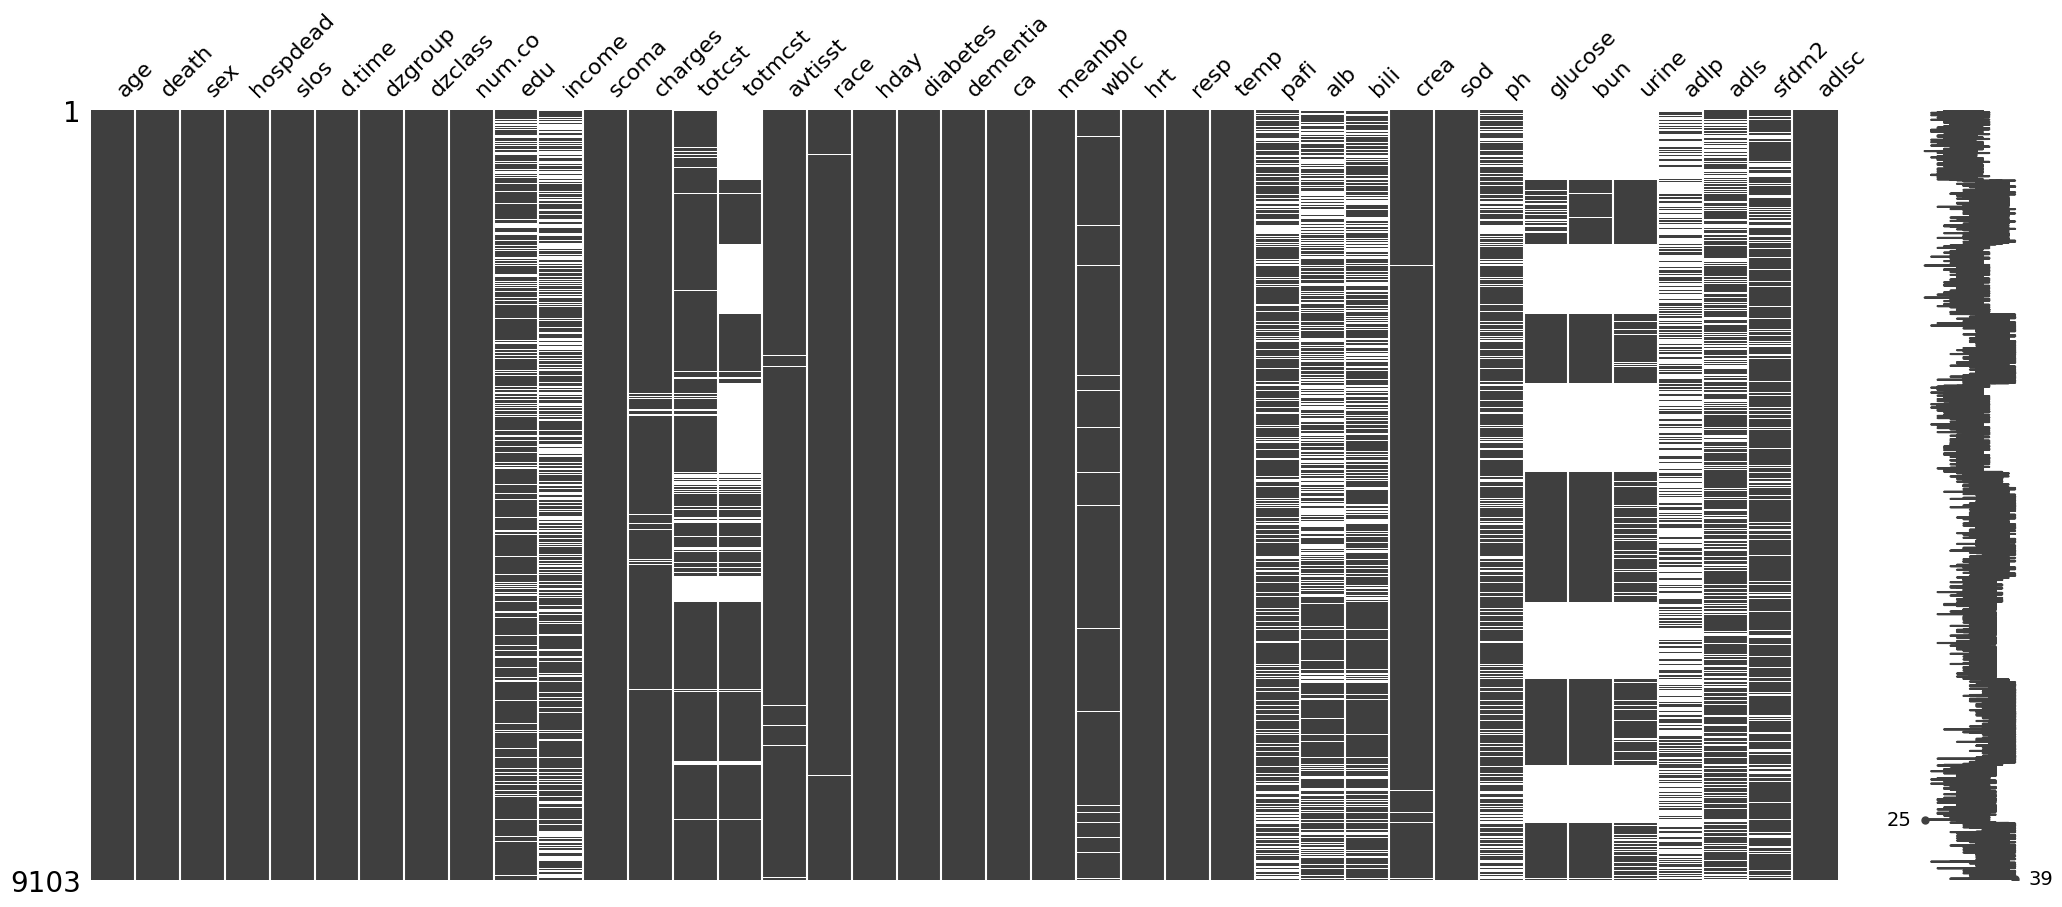

In [221]:
%pip install missingno
import missingno as msno

msno.matrix(data)


In [222]:
data_test = data.copy()

In [223]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 1 to 9105
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9103 non-null   float64
 1   death     9103 non-null   int64  
 2   sex       9103 non-null   object 
 3   hospdead  9103 non-null   int64  
 4   slos      9103 non-null   int64  
 5   d.time    9103 non-null   int64  
 6   dzgroup   9103 non-null   object 
 7   dzclass   9103 non-null   object 
 8   num.co    9103 non-null   int64  
 9   edu       7470 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9102 non-null   float64
 12  charges   8932 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9021 non-null   float64
 16  race      9061 non-null   object 
 17  hday      9103 non-null   int64  
 18  diabetes  9103 non-null   int64  
 19  dementia  9103 non-null   int64  
 20  ca        9103 non-null   object 
 

In [224]:
data_test_non_categorical = data.select_dtypes(exclude=['object', 'category'])


<Axes: >

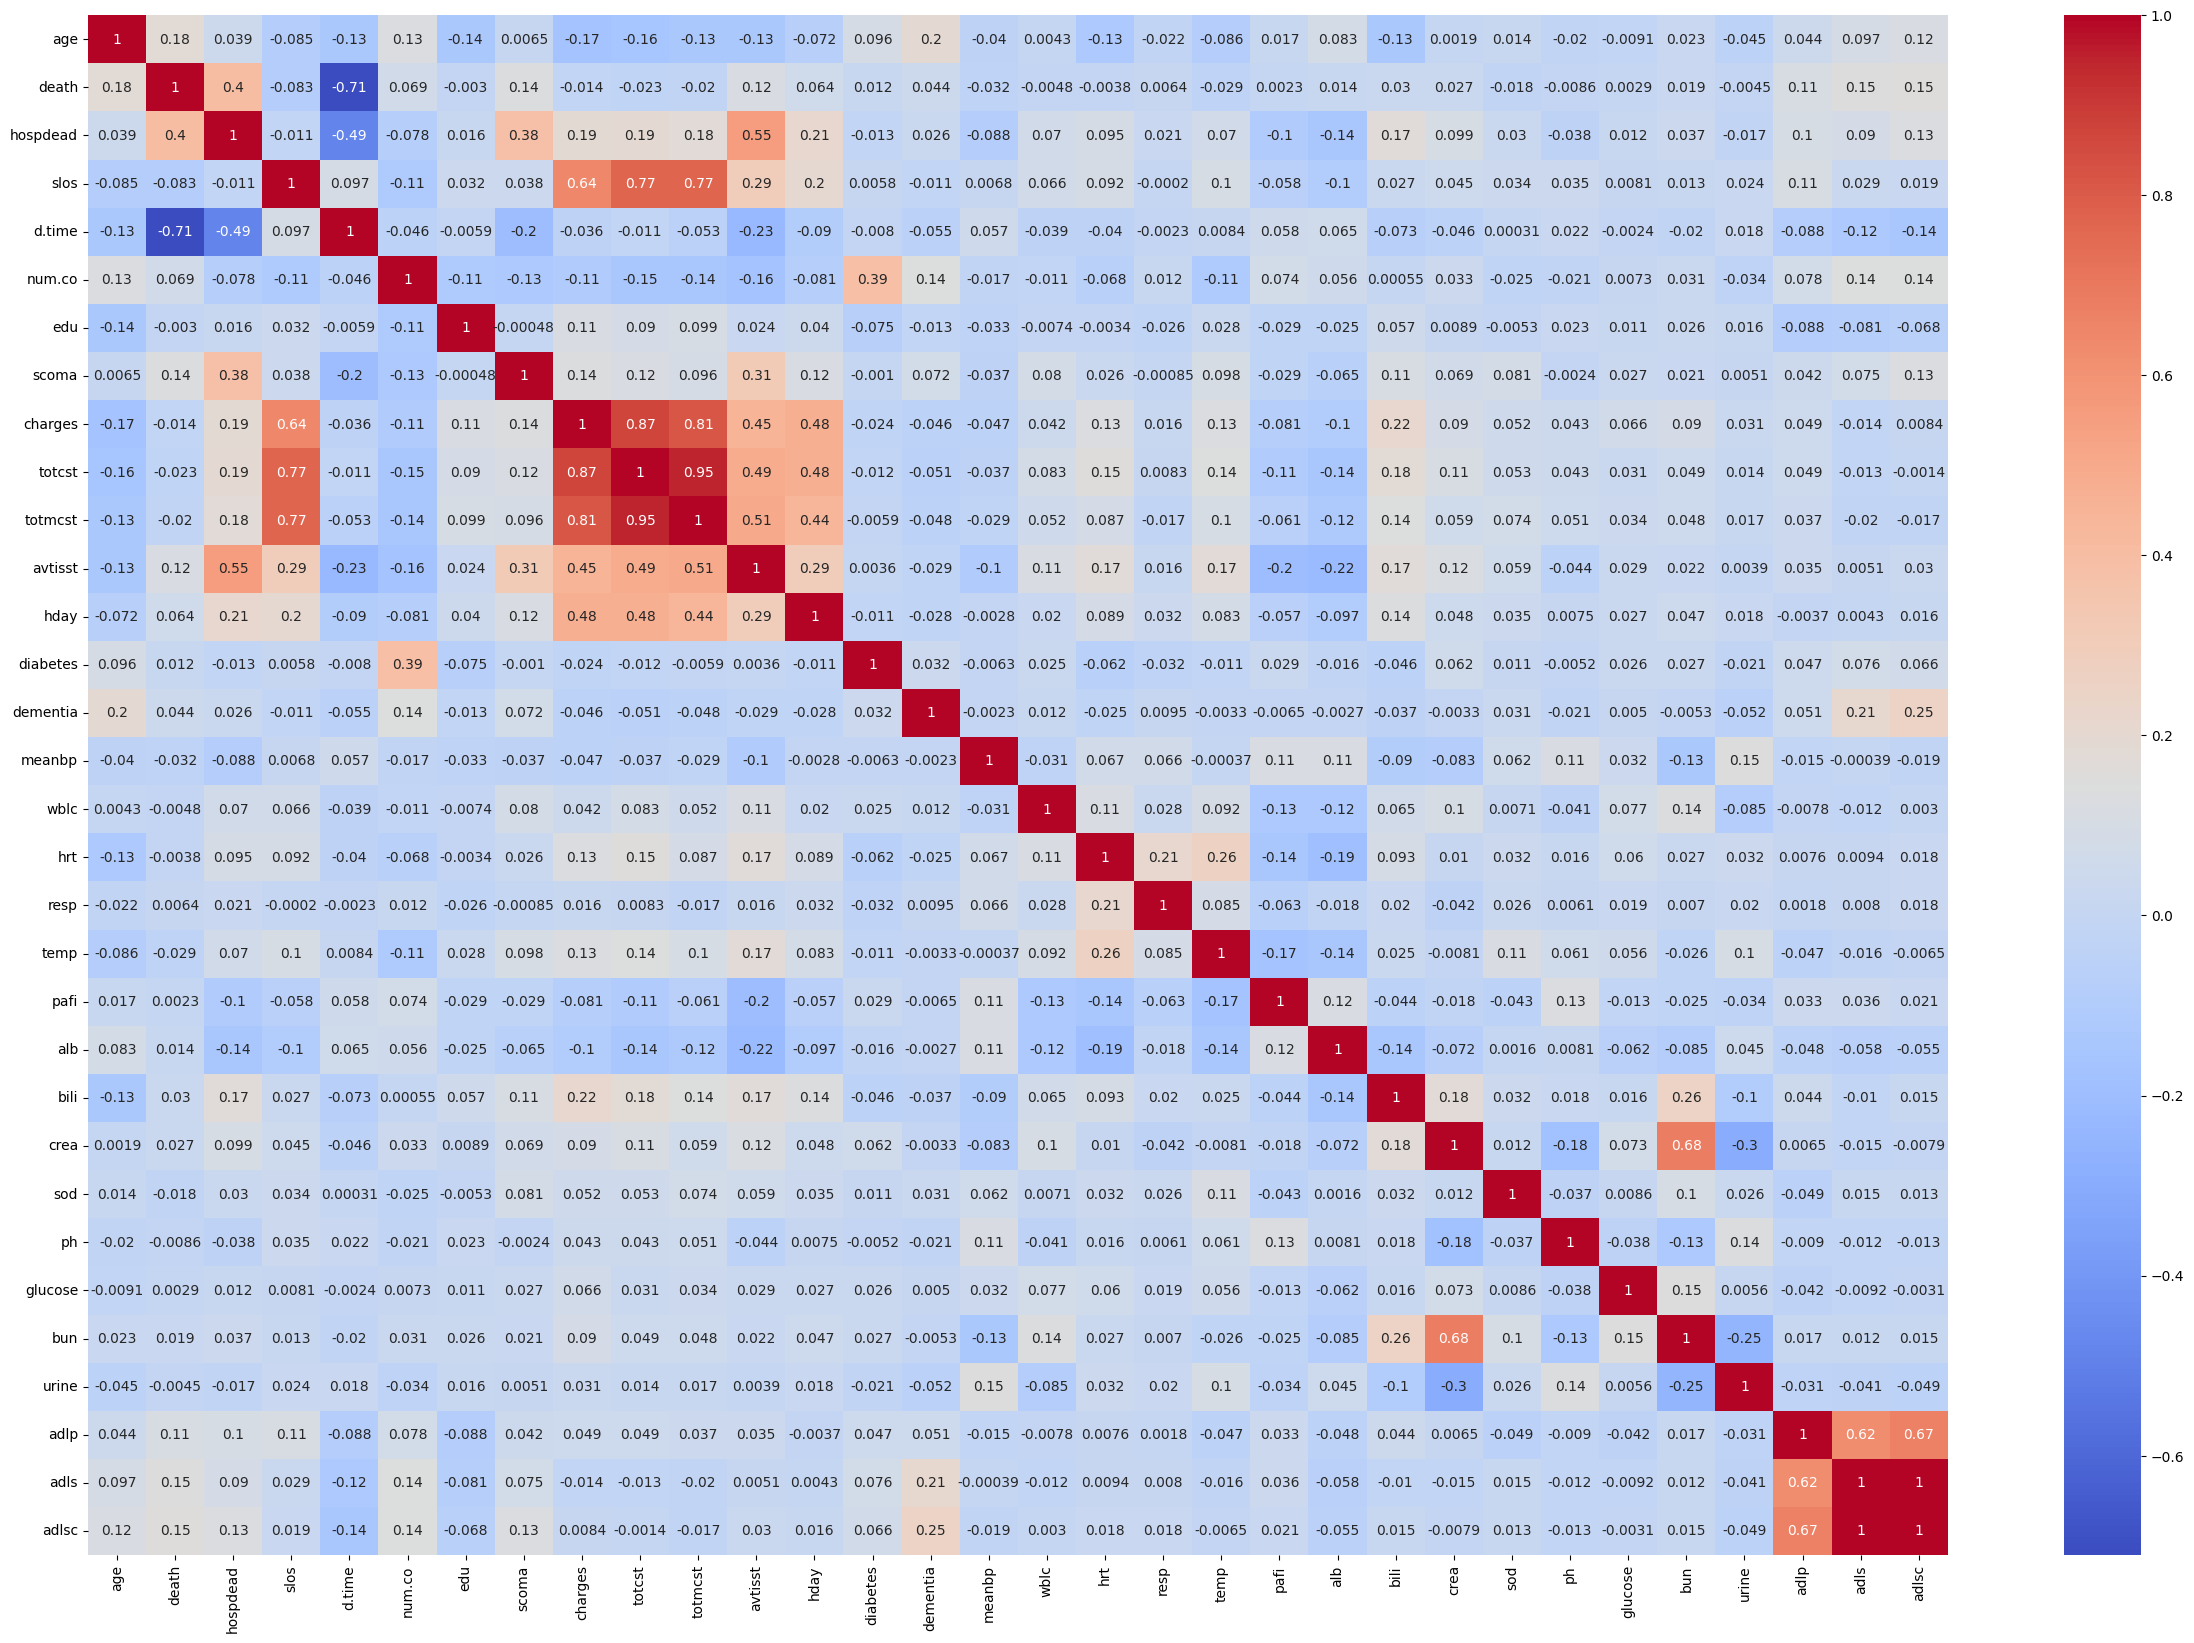

In [225]:
plt.figure(figsize=(30,20))
sns.heatmap(data_test_non_categorical.corr(),cmap="coolwarm", annot= True)


In [227]:
data['charges'].value_counts(dropna=False)

charges
NaN         171
9280.0        4
4510.0        4
5894.0        3
15597.0       3
           ... 
30041.0       1
10480.0       1
156416.0      1
9059.0        1
15604.0       1
Name: count, Length: 8501, dtype: int64

In [228]:
data.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'hday', 'diabetes', 'dementia', 'ca',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

In [229]:
data.isnull().sum()

age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1633
income      2980
scoma          1
charges      171
totcst       886
totmcst     3473
avtisst       82
race          42
hday           0
diabetes       0
dementia       0
ca             0
meanbp         0
wblc         211
hrt            0
resp           0
temp           0
pafi        2323
alb         3371
bili        2600
crea          66
sod            0
ph          2282
glucose     4498
bun         4350
urine       4860
adlp        5639
adls        2866
sfdm2       1399
adlsc          0
dtype: int64

<Axes: >

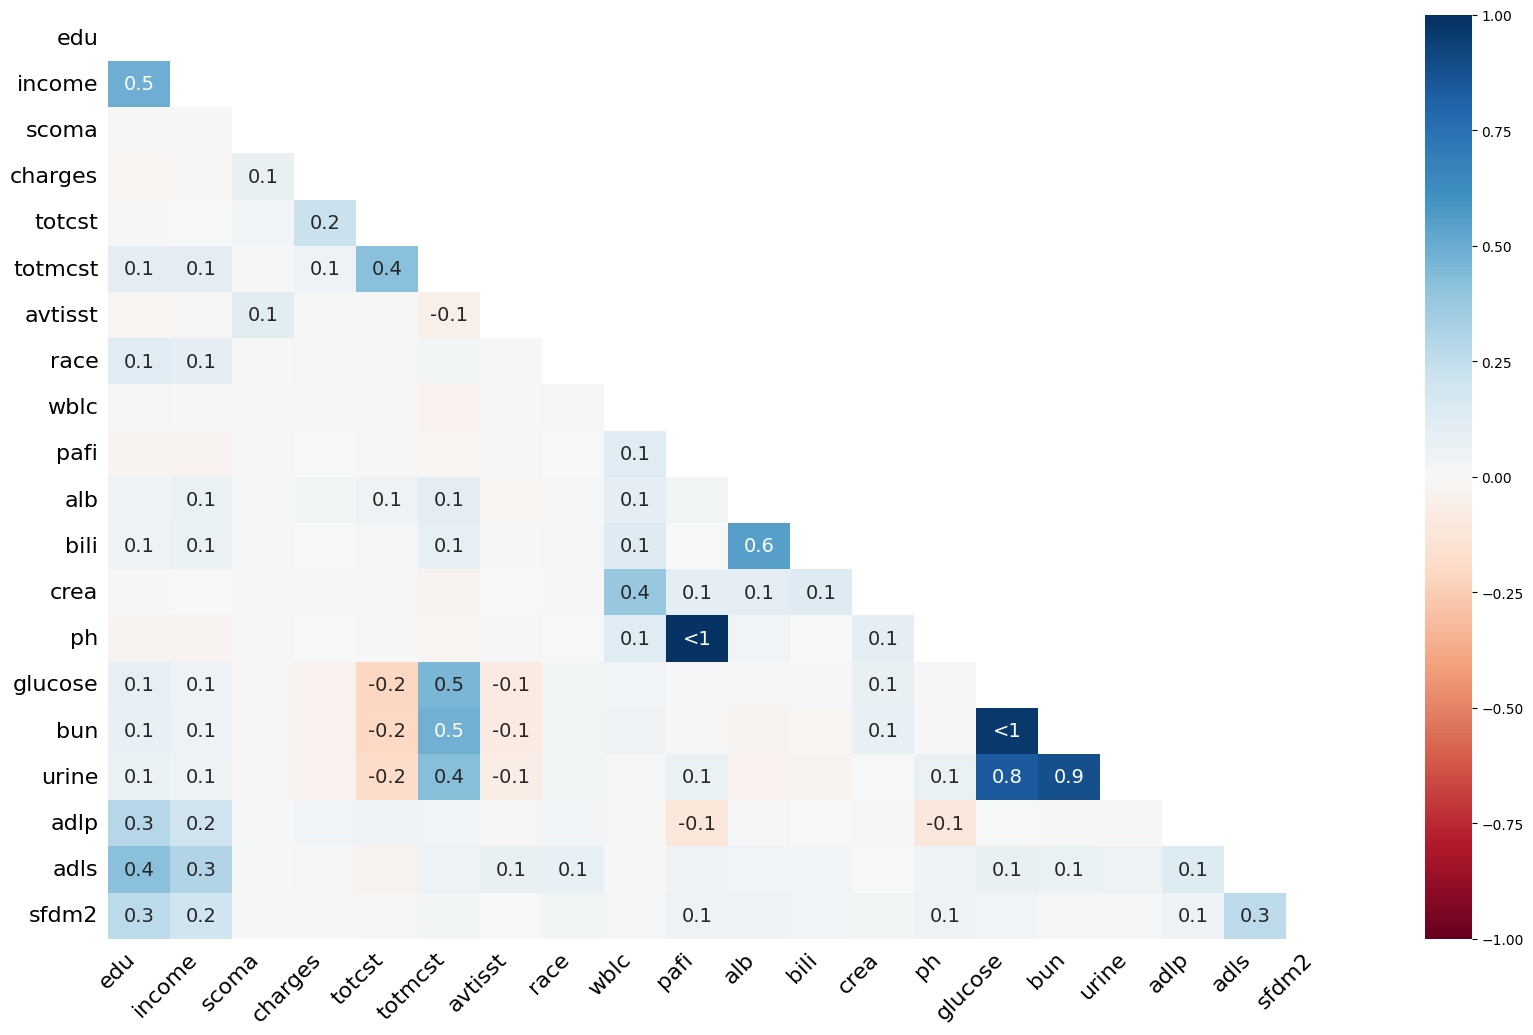

In [230]:
msno.heatmap(data)

## age

Mean of age: 62.65
Standard deviation of age: 15.60
Number of outliers in age: 0
Outliers values:
[]


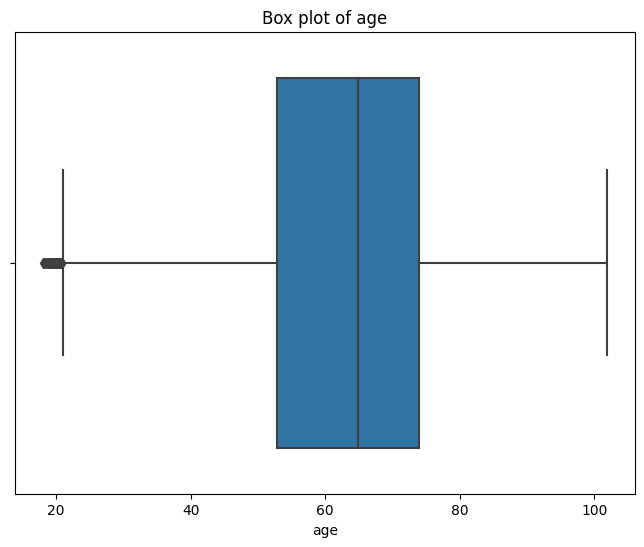

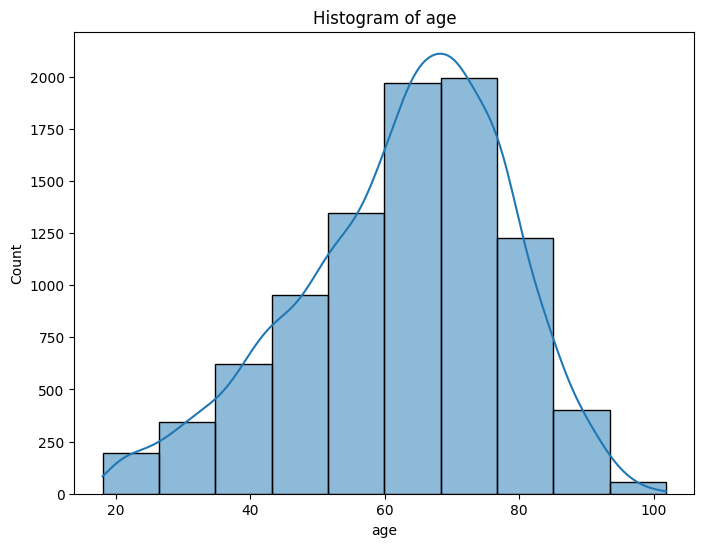

In [232]:
data_exploration(data, 'age')

## death

Counts and percentages of unique values in death:

       Count  Percentage
death                   
1       6199   68.098429
0       2904   31.901571


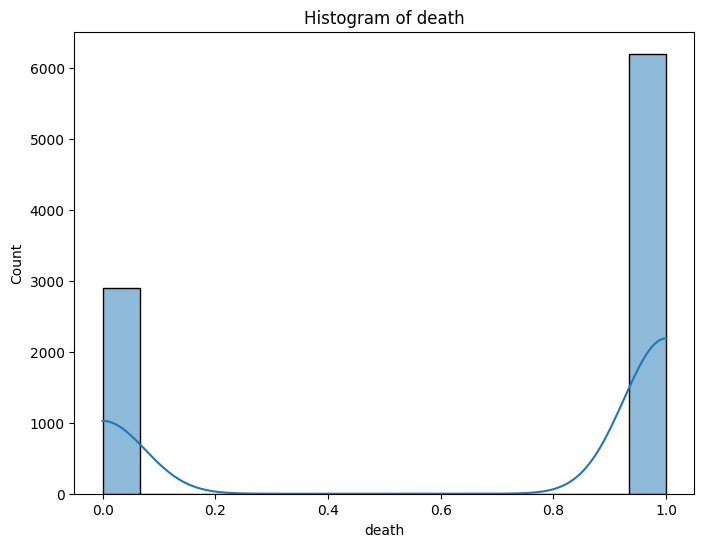

In [233]:
data_exploration(data, 'death')

## sex

Counts and percentages of unique values in sex:

        Count  Percentage
sex                      
male     5125   56.300121
female   3978   43.699879


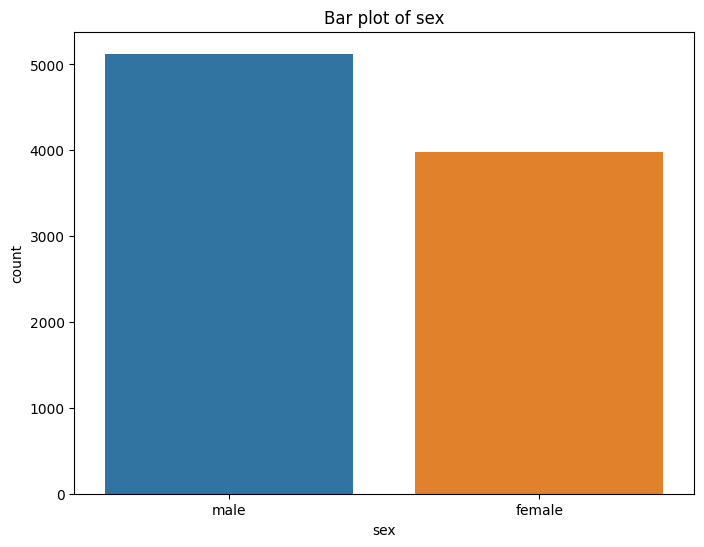

In [234]:
data_exploration(data, 'sex')

## hospdead

Counts and percentages of unique values in hospdead:

          Count  Percentage
hospdead                   
0          6743   74.074481
1          2360   25.925519


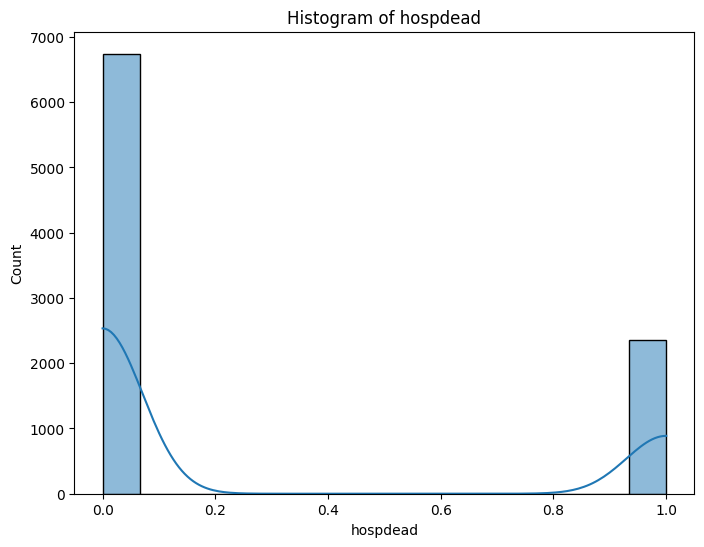

In [235]:
data_exploration(data, 'hospdead')

## slos

Mean of slos: 17.86
Standard deviation of slos: 22.01
Number of outliers in slos: 347
Outliers values:
[115 105  72 120 109  90  85 106 281  96 116  81  76 164  64  73  94  74
 118 145  87  69  93  66 103  99  74 132 124  90  71  82  63  87  91  93
  64  99  73 107  71 110 122  81  94 109  79  93  73  82  81  71  69 107
 127  71  85 118  64  66  73 168  68  86 128 142 172  72  82 114 111 121
  75 121  96 100  63  67  89 142 241  87  93 156  95  88  74 106  87 226
  90 121  76 102  66  75 110 100  76 127  65  66  73  65 154  86  79  82
  67  97 109 136  70  90  77 223 236  84  70  97  71  85 110 103 117  92
  89 245  66 207  90  77 113 134 129 134  88  67  68  77  65  95  93  81
  69  73  91 117 145 192 171  78 148 261  99  75  76  77 116 100  81 109
  87  90 106  81 101 110  74 113  79  93  78  87  87  63 126  71  69  63
  65  74 185  63  66 113  69  68  86 105 110  71 101  94 140 156 102  96
  72  67 107  69  73  73  89  75  88 122  76 111  79  68 104  76  64 106
 113  63 121 339 112 

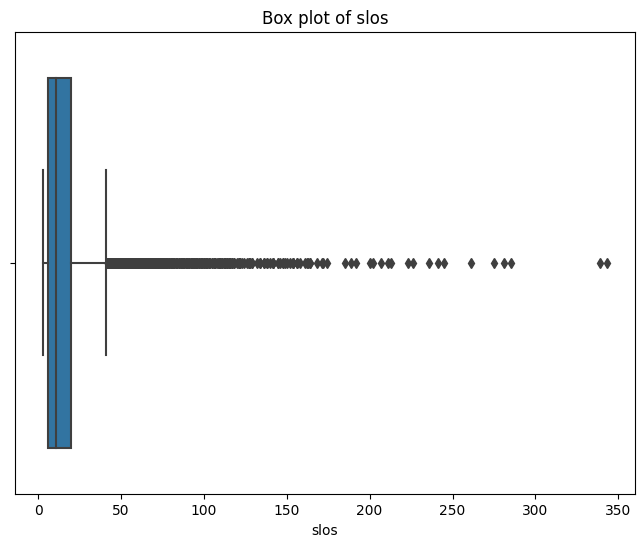

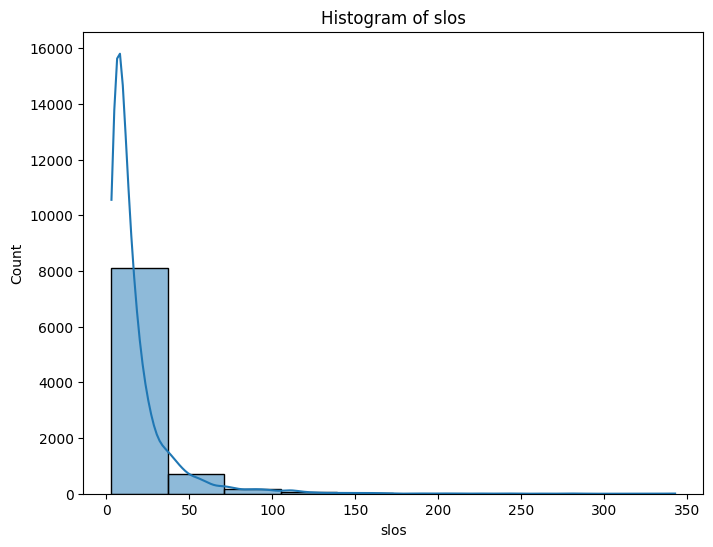

In [236]:
data_exploration(data, 'slos')

In [237]:
data.value_counts('slos', dropna= False).sort_index()

slos
3      347
4      656
5      687
6      632
7      643
      ... 
275      1
281      1
285      1
339      1
343      1
Name: count, Length: 167, dtype: int64

## d.time

Mean of d.time: 478.54
Standard deviation of d.time: 560.41
Number of outliers in d.time: 0
Outliers values:
[]


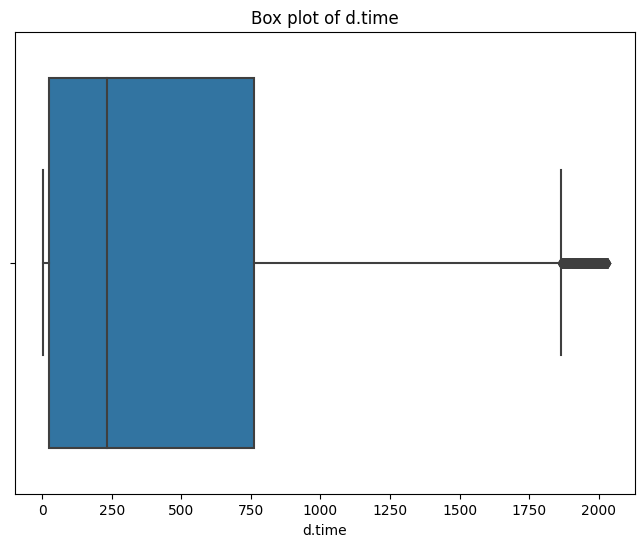

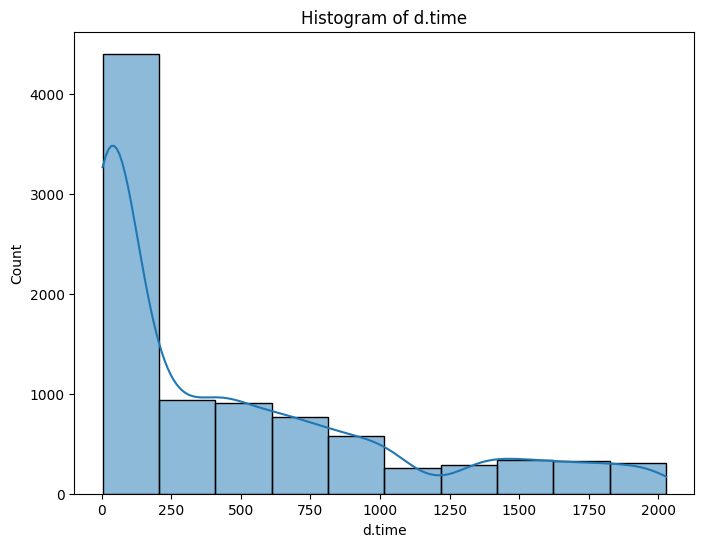

In [238]:
data_exploration(data, 'd.time')

## dzgroup

Counts and percentages of unique values in dzgroup:

                   Count  Percentage
dzgroup                             
ARF/MOSF w/Sepsis   3514   38.602658
CHF                 1387   15.236735
COPD                 967   10.622872
Lung Cancer          908    9.974734
MOSF w/Malig         712    7.821597
Coma                 596    6.547292
Colon Cancer         511    5.613534
Cirrhosis            508    5.580578


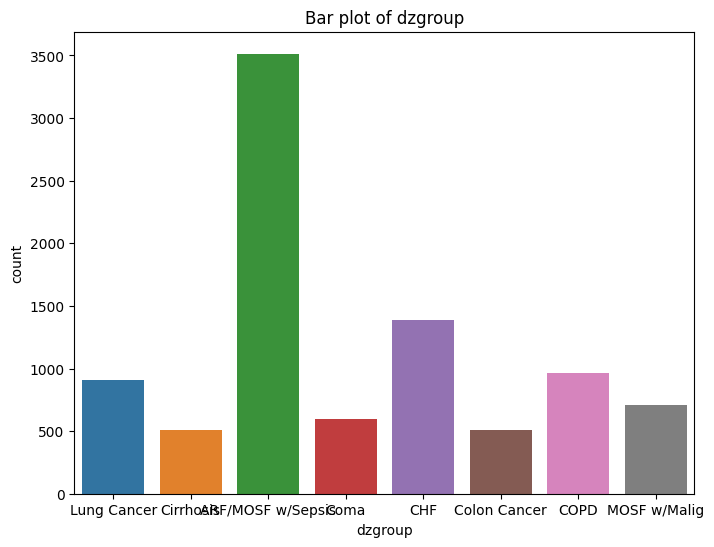

In [239]:
data_exploration(data, 'dzgroup')

## dzclass

Counts and percentages of unique values in dzclass:

                    Count  Percentage
dzclass                              
ARF/MOSF             4226   46.424256
COPD/CHF/Cirrhosis   2862   31.440185
Cancer               1419   15.588268
Coma                  596    6.547292


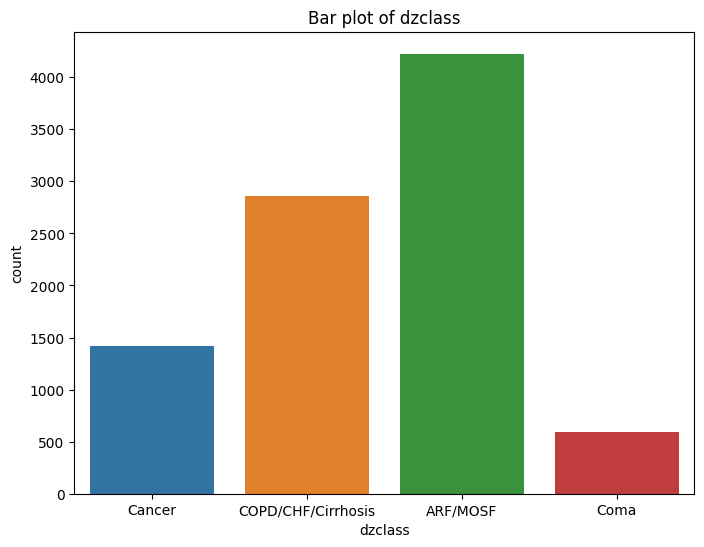

In [240]:
data_exploration(data, 'dzclass')

## num.co

Mean of num.co: 1.87
Standard deviation of num.co: 1.34
Number of outliers in num.co: 0
Outliers values:
[]


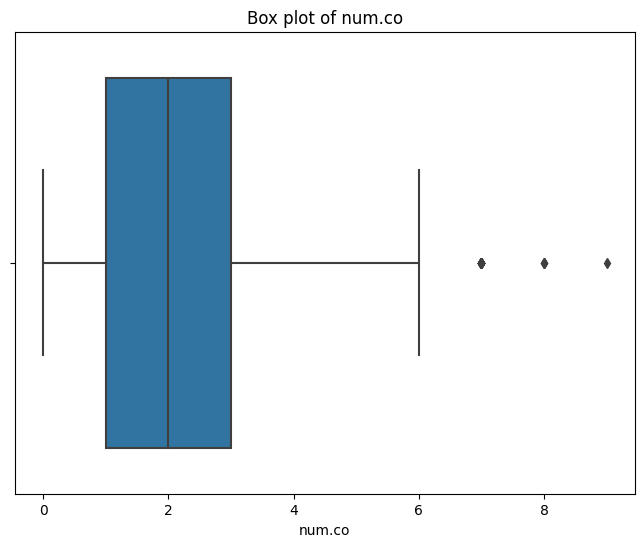

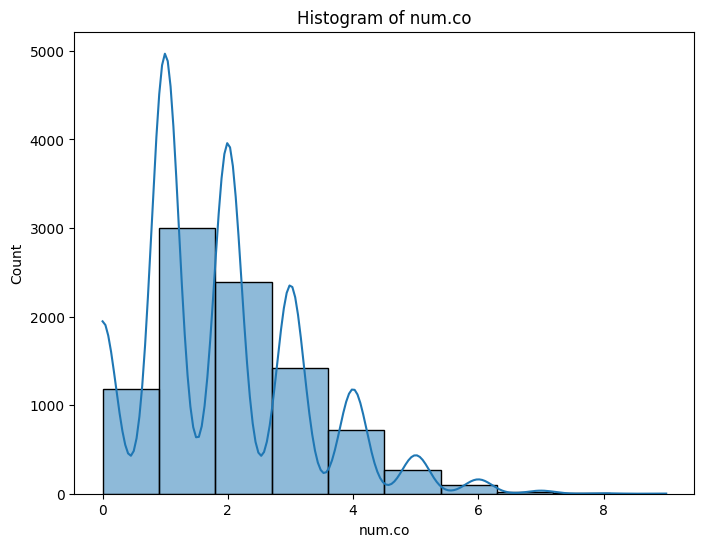

In [241]:
data_exploration(data, 'num.co')

## edu

Mean of edu: 11.75
Standard deviation of edu: 3.45
Number of outliers in edu: 6
Outliers values:
[30. 27. 31. 27. 30. 28.]


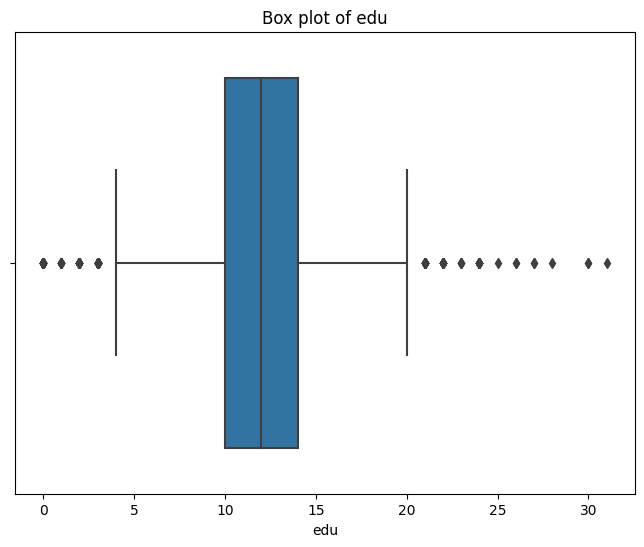

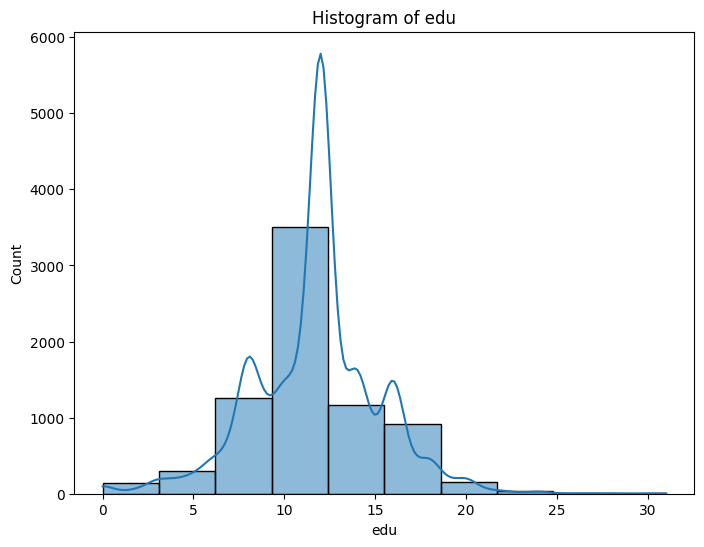

In [242]:
data_exploration(data, 'edu')

In [243]:
#fill with median
data['edu'] = data['edu'].fillna(data['edu'].median())

In [244]:
data.value_counts('edu', dropna=False).sort_index(ascending=False)

edu
31.0       1
30.0       2
28.0       1
27.0       2
26.0       2
25.0       1
24.0      12
23.0       4
22.0      14
21.0      18
20.0      78
19.0      52
18.0     176
17.0     113
16.0     623
15.0     200
14.0     637
13.0     328
12.0    4156
11.0     481
10.0     505
9.0      343
8.0      718
7.0      192
6.0      156
5.0       83
4.0       63
3.0       68
2.0       22
1.0        9
0.0       43
Name: count, dtype: int64

## income

Counts and percentages of unique values in income:

            Count  Percentage
income                       
under $11k   4821   53.077177
$11-$25k     2372   26.114720
$25-$50k     1171   12.892216
>$50k         719    7.915887


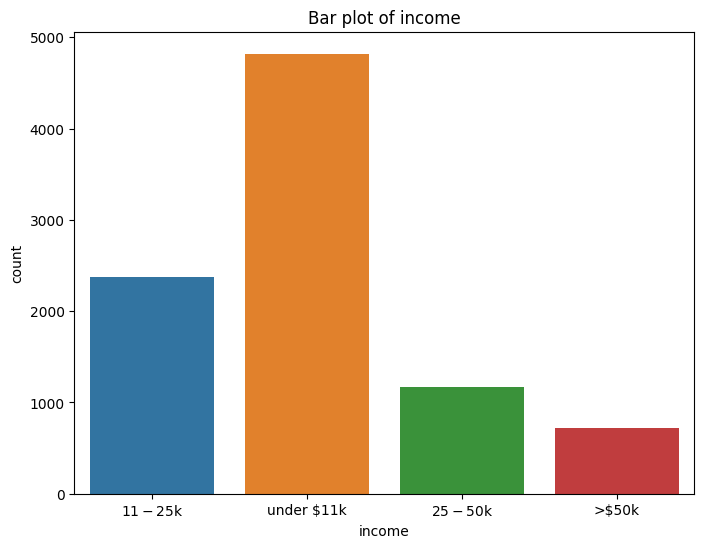

In [388]:
data_exploration(data, 'income')
#predictive imputation

In [246]:
data['income'].nunique()

4

In [247]:
data.value_counts('income', dropna=False).sort_index(ascending=False)

income
under $11k    2855
>$50k          684
$25-$50k      1057
$11-$25k      1527
NaN           2980
Name: count, dtype: int64

In [369]:
# Dropping rows with missing values
data_with_values = data.dropna()

# Categorical columns for encoding
categorical_columns = ['sex', 'edu', 'race', 'ca', 'adlp', 'sfdm2', 'dzclass', 'dzgroup']  # Replace with your categorical column names

# Apply one-hot encoding
data_with_values = pd.get_dummies(data_with_values, columns=categorical_columns)

# After this step, data_with_values will have additional columns, one for each unique value in the categorical columns


In [370]:
print(data_with_values.columns)

Index(['age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'income',
       'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'hday', 'diabetes',
       'dementia', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adls', 'adlsc',
       'sex_female', 'sex_male', 'edu_0.0', 'edu_2.0', 'edu_3.0', 'edu_4.0',
       'edu_5.0', 'edu_6.0', 'edu_7.0', 'edu_8.0', 'edu_9.0', 'edu_10.0',
       'edu_11.0', 'edu_12.0', 'edu_13.0', 'edu_14.0', 'edu_15.0', 'edu_16.0',
       'edu_17.0', 'edu_18.0', 'edu_19.0', 'edu_20.0', 'edu_21.0', 'edu_22.0',
       'edu_25.0', 'edu_28.0', 'race_asian', 'race_black', 'race_hispanic',
       'race_other', 'race_white', 'ca_metastatic', 'ca_no', 'ca_yes',
       'adlp_0.0', 'adlp_1.0', 'adlp_2.0', 'adlp_3.0', 'adlp_4.0', 'adlp_5.0',
       'adlp_6.0', 'adlp_7.0', 'sfdm2_<2 mo. follow-up', 'sfdm2_SIP>=30',
       'sfdm2_adl>=4 (>=5 if sur)', 'sfdm2_no(M2 and SIP pres)',
       'dzclass_ARF

In [371]:
from sklearn.model_selection import train_test_split

# Prepare features and target
X = data_with_values.drop('income', axis=1)  # Drop the target variable from the features
y = data_with_values['income']  # Target variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [372]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)


In [373]:
# Training the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [374]:
from sklearn.metrics import accuracy_score, classification_report

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.43846153846153846
Classification Report:
               precision    recall  f1-score   support

    $11-$25k       0.34      0.29      0.31        38
    $25-$50k       0.33      0.08      0.13        25
       >$50k       0.00      0.00      0.00        10
  under $11k       0.49      0.77      0.60        57

    accuracy                           0.44       130
   macro avg       0.29      0.29      0.26       130
weighted avg       0.38      0.44      0.38       130



In [375]:
from sklearn.model_selection import cross_val_score

# Using the same RandomForestClassifier for cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())


Cross-validation scores: [0.5        0.48076923 0.4368932  0.48543689 0.48543689]
Average CV Score: 0.47770724421209854


In [376]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Accuracy:", log_reg_model.score(X_test, y_test))


Logistic Regression Accuracy: 0.4846153846153846


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [377]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("SVM Accuracy:", svm_model.score(X_test, y_test))


SVM Accuracy: 0.43846153846153846


In [378]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb_model.score(X_test, y_test))


Gradient Boosting Accuracy: 0.45384615384615384


In [379]:
# Isolate rows with missing 'income' values
missing_income_data = data[data['income'].isna()]

# Prepare features for these rows (excluding the 'income' column)
X_missing_income = missing_income_data.drop('income', axis=1)


In [380]:
# Apply the same preprocessing to X_missing_income as you did to the training data
# For example, if you used one-hot encoding:
X_missing_income = pd.get_dummies(X_missing_income, columns=categorical_columns)


In [382]:
X_missing_income

,age,death,hospdead,slos,d.time,num.co,scoma,charges,totcst,totmcst,avtisst,hday,diabetes,dementia,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adls,adlsc,sex_female,sex_male,edu_0.0,edu_1.0,edu_2.0,edu_3.0,edu_4.0,edu_5.0,edu_6.0,edu_7.0,edu_8.0,edu_9.0,edu_10.0,edu_11.0,edu_12.0,edu_13.0,edu_14.0,edu_15.0,edu_16.0,edu_17.0,edu_18.0,edu_19.0,edu_20.0,edu_21.0,edu_22.0,edu_23.0,edu_24.0,race_asian,race_black,race_hispanic,race_other,race_white,ca_metastatic,ca_no,ca_yes,adlp_0.0,adlp_1.0,adlp_2.0,adlp_3.0,adlp_4.0,adlp_5.0,adlp_6.0,adlp_7.0,sfdm2_<2 mo. follow-up,sfdm2_Coma or Intub,sfdm2_SIP>=30,sfdm2_adl>=4 (>=5 if sur),sfdm2_no(M2 and SIP pres),dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig
5,79.88495,0,0,16,2029,1,26.0,50127.0,14484.29295,NaN,18.666656,3,0,0,59.0,13.500000,112.0,20.0,37.89844,173.3125,3.500000,1.010000,0.799927,143.0,7.509766,NaN,6.51,2502.0,2.0,2.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False
6,93.01599,1,1,4,4,1,55.0,6884.0,14484.29295,NaN,5.000000,1,0,0,110.0,10.398438,101.0,44.0,38.39844,266.6250,3.500000,1.010000,0.699951,140.0,7.659180,NaN,6.51,2502.0,1.0,1.000000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
8,86.83899,1,0,7,142,3,26.0,30460.0,14484.29295,NaN,6.500000,1,1,0,72.0,13.599609,100.0,26.0,37.59375,404.7500,3.500000,1.010000,2.000000,139.0,7.509766,NaN,6.51,2502.0,0.0,0.000000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
9,85.65594,1,0,12,63,2,26.0,25019.5,14484.29295,NaN,8.500000,1,0,1,97.0,9.699219,56.0,20.0,36.59375,357.1250,3.500000,0.399963,1.000000,143.0,7.449219,NaN,6.51,2502.0,7.0,7.000000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
11,47.94498,1,0,7,114,1,0.0,15558.0,14484.29295,NaN,12.500000,1,0,0,70.0,10.898438,105.0,24.0,36.50000,333.3000,4.199219,0.500000,1.000000,134.0,NaN,NaN,6.51,2502.0,1.0,1.000000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,70.42297,1,0,15,17,4,0.0,80504.0,56370.81250,55285.3750,40.6666

In [384]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy of your choice
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.

# Fit the imputer on your data and transform it
X_missing_income_imputed = imputer.fit_transform(X_missing_income)

# Now predict the missing 'income' values
predicted_income = model.predict(X_missing_income_imputed)




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [385]:
# Impute the predicted 'income' values back into the original dataset
data.loc[data['income'].isna(), 'income'] = predicted_income


## scoma

Mean of scoma: 12.06
Standard deviation of scoma: 24.64
Number of outliers in scoma: 1516
Outliers values:
[44. 55. 44. ... 44. 44. 41.]


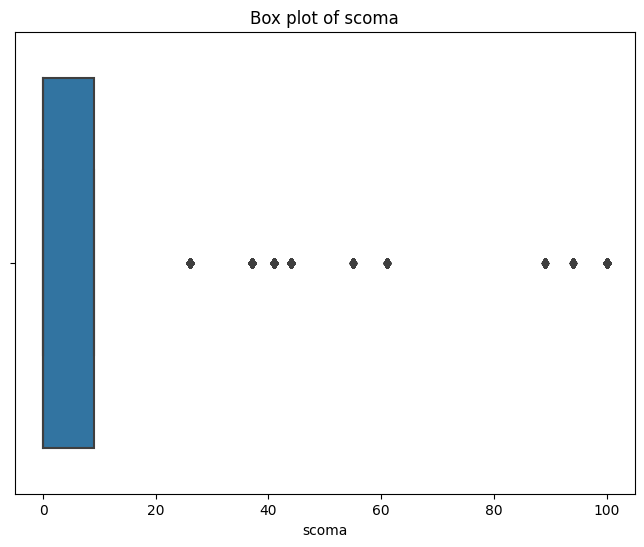

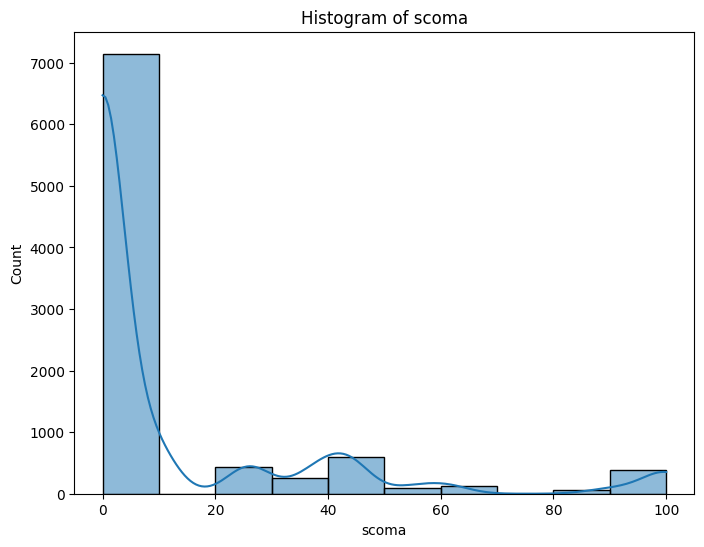

In [299]:
data_exploration(data, 'scoma')
#drop the one row with missing value in 'scoma'
data = data.dropna(subset=['scoma'])

In [249]:
data['scoma'].value_counts(dropna=False).sort_index(ascending=False)

scoma
100.0     331
94.0       61
89.0       54
61.0      128
55.0       98
44.0      399
41.0      194
37.0      251
26.0      439
9.0       748
0.0      6399
Name: count, dtype: int64

## charges

Mean of charges: 59992.15
Standard deviation of charges: 102653.95
Number of outliers in charges: 448
Outliers values:
[ 706577.     283303.     542266.     465380.     271250.     348931.
  230733.     320843.     321716.     538692.     302353.     397017.
  231119.     283145.     433684.     483991.     229314.     506141.
  740010.     274531.     256835.     392950.     279530.     268805.
  469824.     641888.     277421.     970982.    1273347.     943804.
  254366.     592486.     659433.     330735.     413774.     409250.
  266998.     348628.     922581.     536925.     786088.     245347.
  260829.     306038.     463001.     260514.     257589.     481475.
  241565.     603388.     352017.     372459.     597427.     271731.
  237244.     370093.     242746.     269517.     303548.     414803.
  303934.     353422.     254601.     239683.     359124.     448431.
  542326.     444556.    1435423.     565876.     480519.     349052.
  374053.     563075.     283844.     308

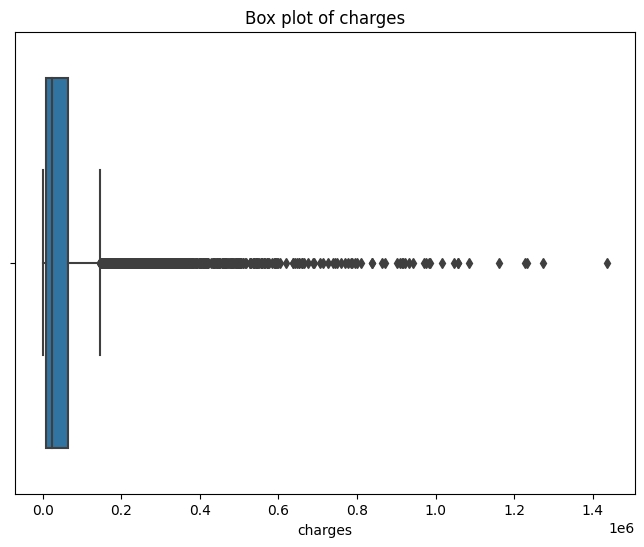

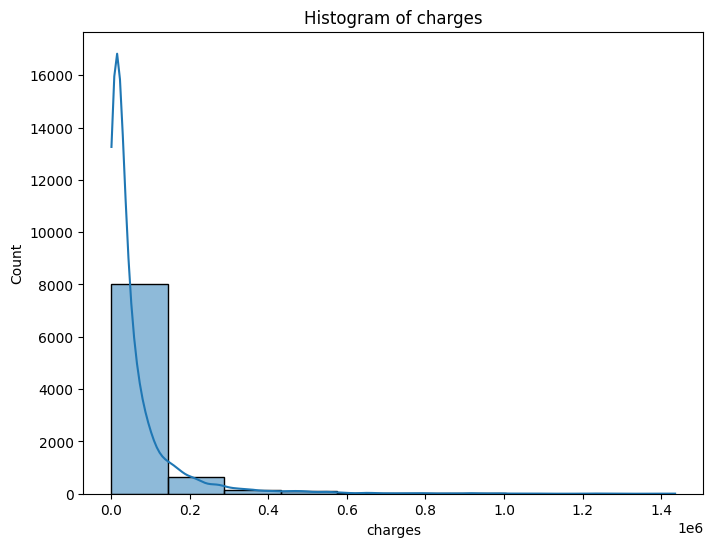

In [250]:
data_exploration(data, 'charges')
#predictive imputation

In [251]:
# First, calculate the median of the 'charges' column
median_charges = data['charges'].median()

# Now, replace NaN values in 'charges' with this median value
data['charges'].fillna(median_charges, inplace=True)


In [252]:
data['totmcst'].value_counts(dropna=False,ascending=True).sort_index()


totmcst
-102.71997          1
-28.48000           1
 0.00000          102
 402.90991          1
 470.62988          1
                 ... 
 494838.00000       1
 505211.00000       1
 528444.00000       1
 710682.00000       1
 NaN             3472
Name: count, Length: 5517, dtype: int64

In [253]:
data.shape

(9102, 39)

In [254]:
data[data['totmcst'] < 0]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
7763,65.69196,1,male,0,25,26,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,NaN,0.0,206035.0,79364.5625,-102.71997,38.25,white,69,0,0,no,151.0,15.798828,146.0,32.0,39.19531,282.0,2.199707,0.899902,4.599609,141.0,7.429688,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,2.108887
7783,63.12097,1,male,0,13,39,ARF/MOSF w/Sepsis,ARF/MOSF,0,12.0,NaN,0.0,17871.0,16333.0469,-28.48000,21.50,white,14,0,0,no,150.0,11.099609,56.0,16.0,35.59375,NaN,NaN,NaN,3.899902,138.0,NaN,NaN,NaN,NaN,0.0,0.0,<2 mo. follow-up,0.000000


In [255]:
data[data['totmcst'] >= 0].shape

(5628, 39)

In [256]:
data = data[(data['totmcst']!= -102.71997)& (data['totmcst'] != -28.48000) ]

In [257]:
data[data['hrt'].isnull()]


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc


<Axes: >

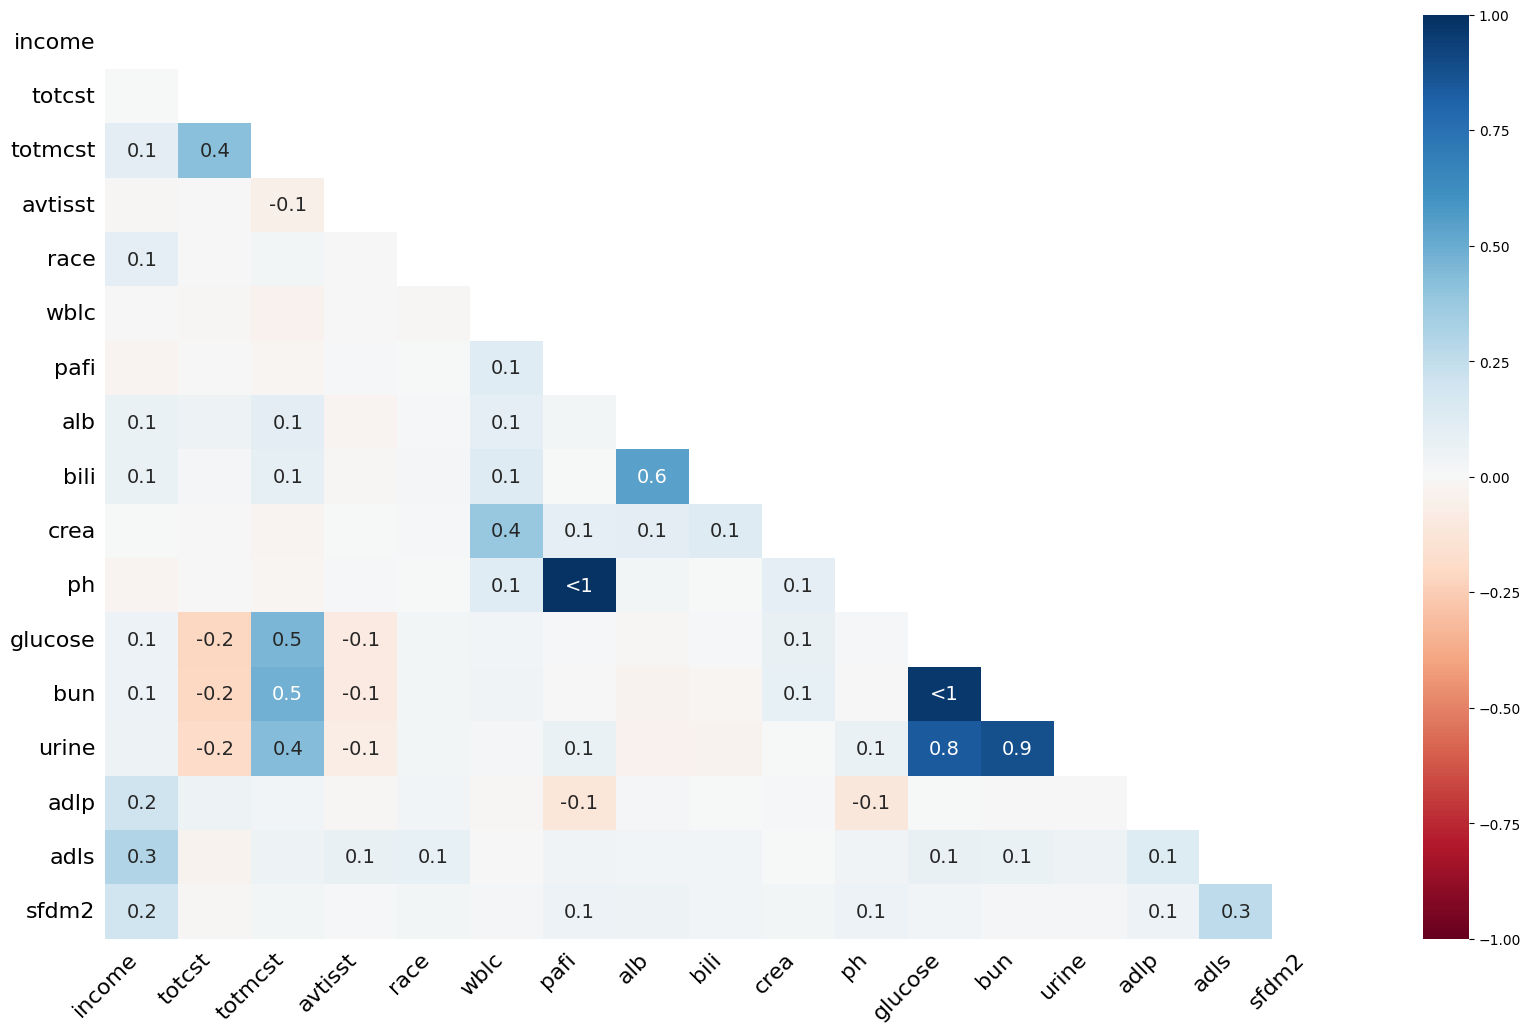

In [258]:
msno.heatmap(data)

## totcst

Mean of totcst: 29287.58
Standard deviation of totcst: 43790.74
Number of outliers in totcst: 433
Outliers values:
[390460.5   156674.125 288592.25  304749.25  136387.875 173763.5
 119196.    165178.875 162087.25  301788.5   155929.75  207528.5
 214329.25  285715.25  272995.25  357918.75  165149.    123820.938
 112886.875 197040.125 180716.375 132976.5   232752.25  328378.5
 133680.875 134573.25  633212.    121042.438 473212.25  144957.75
 139701.25  298585.25  324373.75  110654.812 128401.812 177669.875
 268835.5   421848.5   111605.25  129712.875 118488.25  165393.375
 269057.    173060.625 125511.5   247740.75  129540.125 324555.
 237611.75  185530.625 312839.5   130874.125 115715.938 215823.25
 183324.25  117194.312 156722.375 185368.625 139610.125 190804.
 115477.625 122276.312 168043.625 236295.25  233671.25  341404.25
 180218.625 136717.875 174356.5   129202.75  212786.5   275272.75
 112461.688 182175.25  211648.875 276147.5   133509.5   483556.25
 115186.    186497.75  183641.7

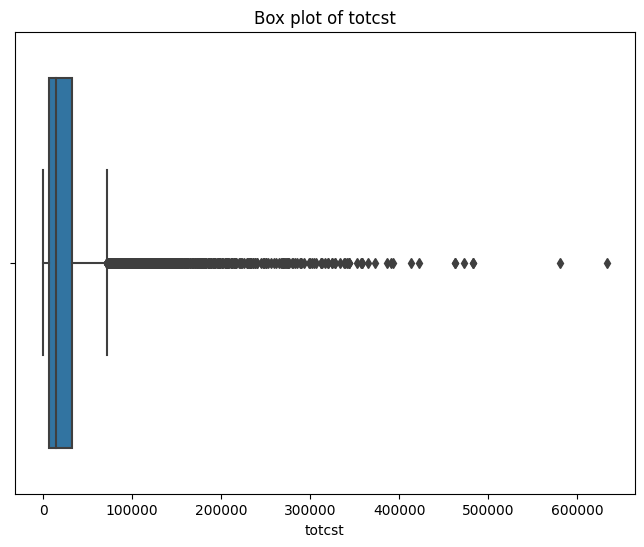

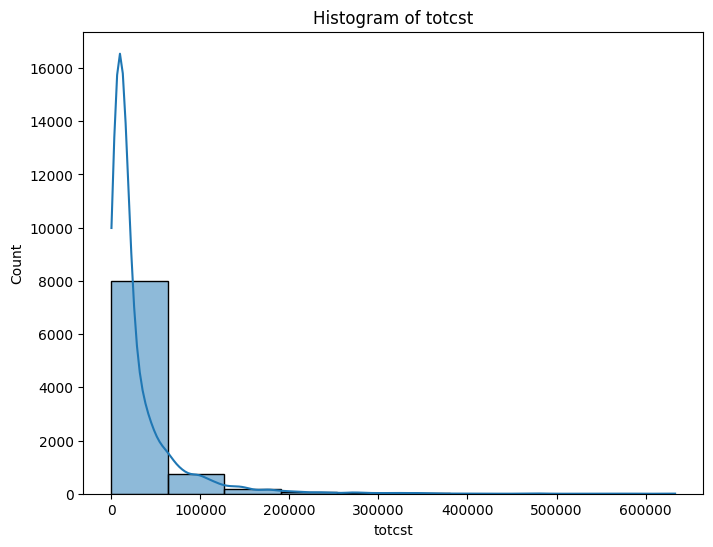

In [349]:
data_exploration(data, 'totcst')
#ratio of totmcst and charges, can be done better by imputing the other two and remaking this column 
#or just dropping it or the other two after computing

In [344]:
data = data[data['totcst'] != 0]

In [346]:
# Calculate the median of the 'totcst' column
median_value = data['totcst'].median()

# Impute missing values in 'totcst' with the median
data['totcst'] = data['totcst'].fillna(median_value)

/var/folders/gm/g5ygsmvs5818mzw0tptl_zxw0000gn/T/ipykernel_4927/3870468532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totcst'] = data['totcst'].fillna(median_value)


In [260]:
data['totcst'].value_counts(dropna=False,ascending=False).sort_index()
#cant be zero, cause its a ratio 
#drop columns with zero or impute with predictive guesses 

totcst
0.0000          17
39.4960          1
93.8955          1
420.3059         1
562.8140         1
              ... 
483192.5000      1
483556.2500      1
581140.0000      1
633212.0000      1
NaN            885
Name: count, Length: 8196, dtype: int64

## totmcst

Mean of totmcst: 28839.15
Standard deviation of totmcst: 43608.61
Number of outliers in totmcst: 223
Outliers values:
[134474.75  205850.25  159476.75  200250.125 200240.375 154506.25
 189590.375 127205.188 374988.5   216081.625 200351.25  135325.125
 171166.25  175344.5   128462.438 152019.375 127812.75  145548.125
 130626.312 403864.75  204853.625 259698.125 140814.375 234875.
 329348.75  190487.75  165394.125 208533.75  165328.875 132617.125
 168425.75  129080.562 138829.5   213677.5   127801.062 505211.
 528444.    321893.5   235552.125 156396.75  190491.625 152409.25
 303778.5   189351.5   133639.125 137877.375 131994.875 165700.25
 126851.562 180428.125 141648.125 208260.125 135322.875 203412.75
 225433.625 155250.5   157278.375 152781.125 225256.125 355017.75
 202004.    132201.875 140531.625 132413.375 138522.    146630.375
 140280.125 179734.125 149915.625 166759.125 164658.375 184564.75
 129240.75  159707.125 135075.75  128066.688 237194.25  205494.25
 144530.25  236234.5   1

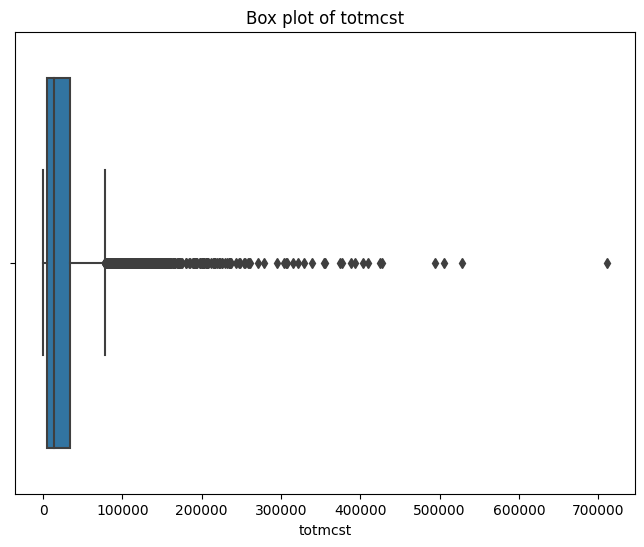

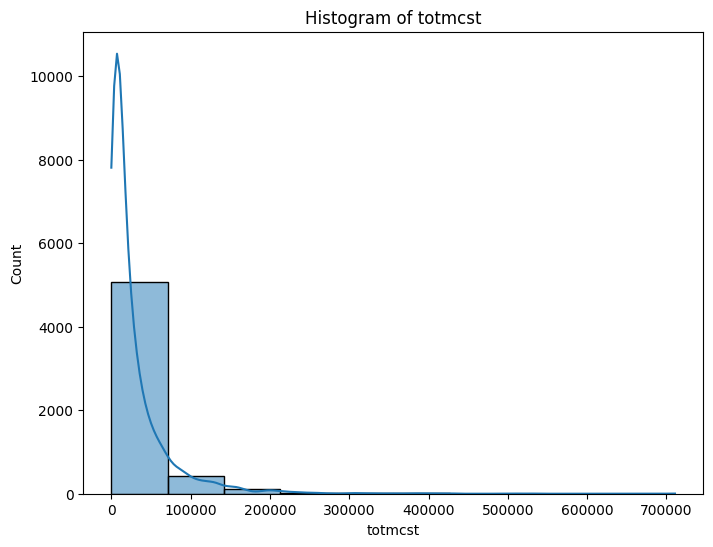

In [261]:
data_exploration(data, 'totmcst')

In [262]:
data['totmcst'].value_counts(dropna=False,ascending=False).sort_index()

totmcst
0.00000          102
402.90991          1
470.62988          1
486.50977          1
497.14990          1
                ... 
494838.00000       1
505211.00000       1
528444.00000       1
710682.00000       1
NaN             3472
Name: count, Length: 5515, dtype: int64

In [263]:
#drop the row with minus totmcst 
#total micro cost cannot be minus 


## avtisst

Mean of avtisst: 22.61
Standard deviation of avtisst: 13.23
Number of outliers in avtisst: 0
Outliers values:
[]


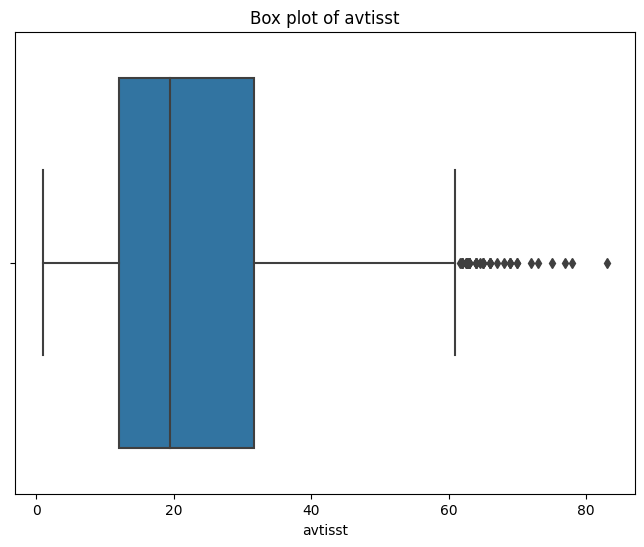

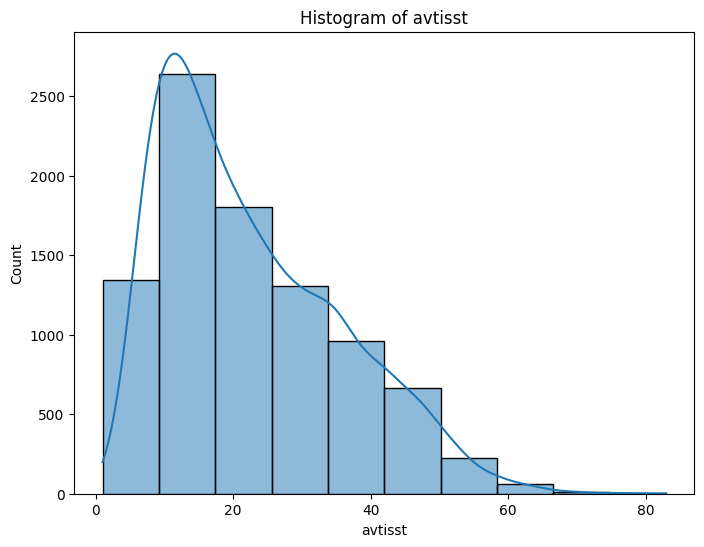

In [264]:
data_exploration(data, 'avtisst')
#predictive better guesses

In [265]:
data['avtisst'].value_counts(dropna=False, ascending=False).sort_index

<bound method Series.sort_index of avtisst
11.000000    245
10.000000    227
12.000000    225
13.000000    214
9.000000     214
            ... 
61.666657      1
58.333313      1
6.750000       1
3.250000       1
3.333332       1
Name: count, Length: 353, dtype: int64>

In [303]:
avtistmed = data['charges'].median()
data['avtisst'].fillna(avtistmed, inplace=True)

## race

Counts and percentages of unique values in race:

          Count  Percentage
race                       
white      7186   79.333186
black      1391   15.356591
hispanic    290    3.201590
other       112    1.236476
asian        79    0.872157


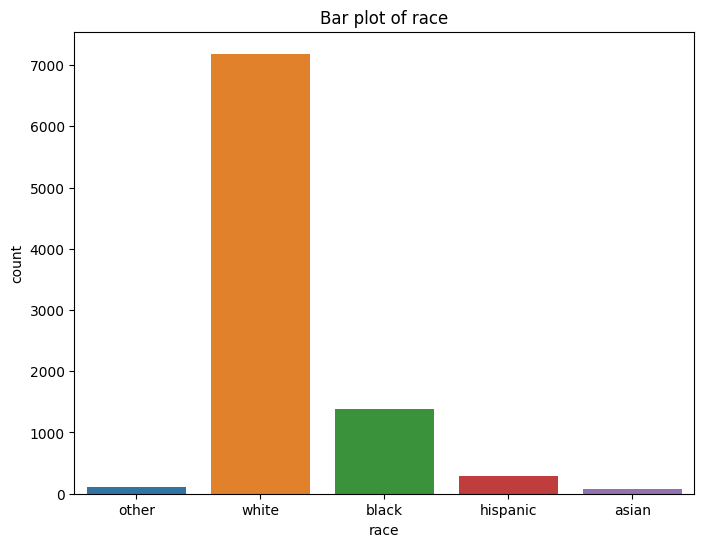

In [266]:
data_exploration(data, 'race')

In [267]:
def impute_missing_with_mode_proportions(data, column):
    """
    Imputes missing values in a specified column of a DataFrame based on the mode 
    and respective proportions of existing data.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name where missing values need to be imputed.

    Returns:
    pd.DataFrame: DataFrame with missing values imputed.
    """
    # Calculate the proportions of each category excluding missing values
    valid_data = data[column].dropna()
    mode_proportions = valid_data.value_counts(normalize=True)

    # Count of missing values
    missing_count = data[column].isnull().sum()

    # Creating the distribution list
    distribution = []
    for value, proportion in mode_proportions.items():
        count_to_add = int(round(proportion * missing_count))
        distribution.extend([value] * count_to_add)

    # Shuffle to randomize
    np.random.shuffle(distribution)

    # Fill missing values
    missing_indices = data[data[column].isnull()].index
    for i, idx in enumerate(missing_indices):
        if i < len(distribution):
            data.at[idx, column] = distribution[i]

    return data



In [301]:
impute_missing_with_mode_proportions(data, 'race')

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,1,0,0,metastatic,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,6.51,2502.0,7.0,7.0,NaN,7.000000
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,3,0,0,no,43.0,17.097656,112.0,34.0,34.59375,98.00000,3.500000,1.010000,5.500000,132.0,7.250000,NaN,6.51,2502.0,NaN,1.0,<2 mo. follow-up,1.000000
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,4,0,0,no,70.0,8.500000,88.0,28.0,37.39844,231.65625,3.500000,2.199707,2.000000,134.0,7.459961,NaN,6.51,2502.0,1.0,0.0,<2 mo. follow-up,0.000000
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,1,0,0,metastatic,75.0,9.099609,88.0,32.0,35.00000,333.30000,3.500000,1.010000,0.799927,139.0,NaN,NaN,6.51,2502.0,0.0,0.0,no(M2 and SIP pres),0.000000
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,NaN,26.0,50127.0,NaN,NaN,18.666656,white,3,0,0,no,59.0,13.500000,112.0,20.0,37.89844,173.31250,3.500000,1.010000,0.799927,143.0,7.509766,NaN,6.51,2502.0,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,32042.7500,20.333328,white,13,0,0,no,109.0,7.399414,104.0,22.0,35.69531,280.00000,3.699707,0.399963,1.099854,131.0,7.459961,188.0,21.00,2502.0,NaN,0.0,NaN,0.000000
9102,55.15399,0,female,0,29,347,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,22131.0469,18.000000,white,1,0,0,no,43.0,9.000000,0.0,8.0,38.59375,218.50000,3.500000,1.010000,5.899414,135.0,7.289062,190.0,49.00,0.0,NaN,0.0,NaN,0.000000
9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,NaN,0.0,46564.0,31409.0156,31131.2500,23.000000,white,18,0,0,no,111.0,8.398438,83.0,24.0,36.69531,180.00000,3.500000,0.399963,2.699707,139.0,7.379883,189.0,60.00,3900.0,NaN,NaN,NaN,2.525391
9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,NaN,35.500000,white,22,0,0,yes,99.0,7.599609,110.0,24.0,36.39844,428.56250,1.199951,0.399963,3.500000,135.0,7.469727,246.0,55.00,2502.0,NaN,0.0,<2 mo. follow-up,0.000000


## hday

Mean of hday: 4.39
Standard deviation of hday: 9.10
Number of outliers in hday: 1116
Outliers values:
[148  13  29 ...  13  18  22]


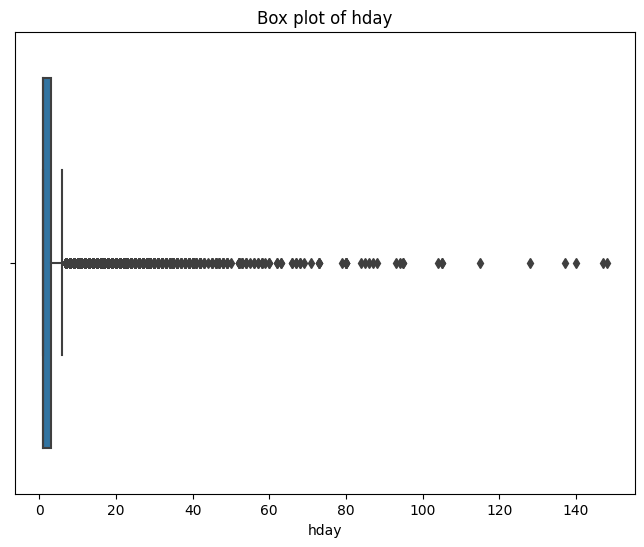

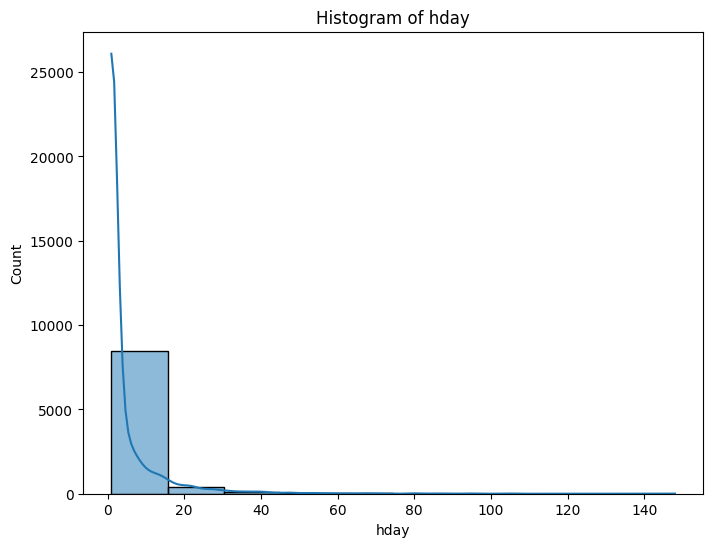

In [269]:
data_exploration(data, 'hday')

In [270]:
data['hday'].value_counts(dropna=False, ascending=False).sort_index

<bound method Series.sort_index of hday
1      5945
2       496
3       398
4       315
5       218
       ... 
44        1
147       1
50        1
85        1
69        1
Name: count, Length: 85, dtype: int64>

## diabetes

Counts and percentages of unique values in diabetes:

          Count  Percentage
diabetes                   
0          7324   80.483516
1          1776   19.516484


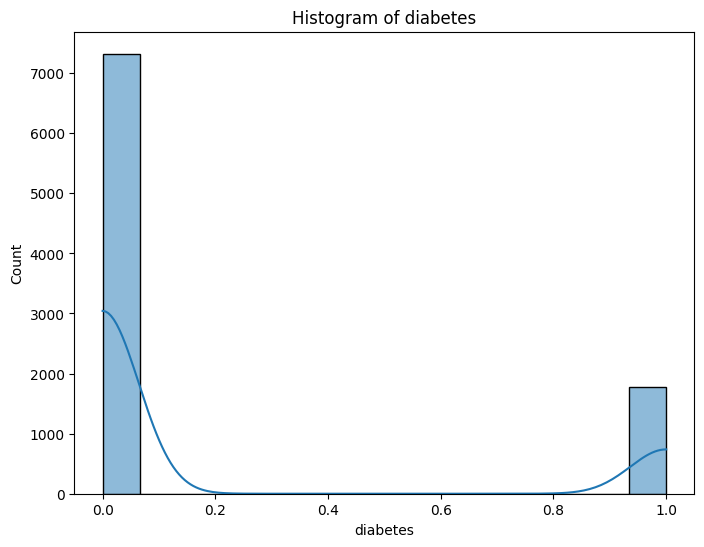

In [271]:
data_exploration(data, 'diabetes')

## dementia

Counts and percentages of unique values in dementia:

          Count  Percentage
dementia                   
0          8804   96.747253
1           296    3.252747


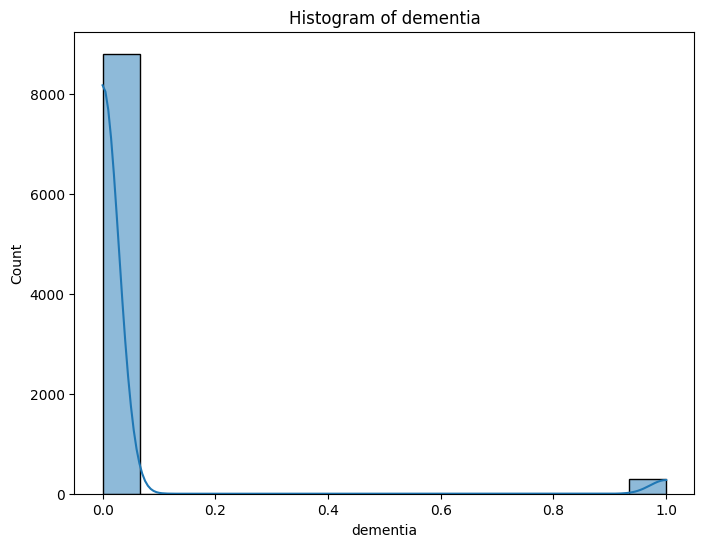

In [272]:
data_exploration(data, 'dementia')

## ca

Counts and percentages of unique values in ca:

            Count  Percentage
ca                           
no           5991   65.835165
metastatic   1857   20.406593
yes          1252   13.758242


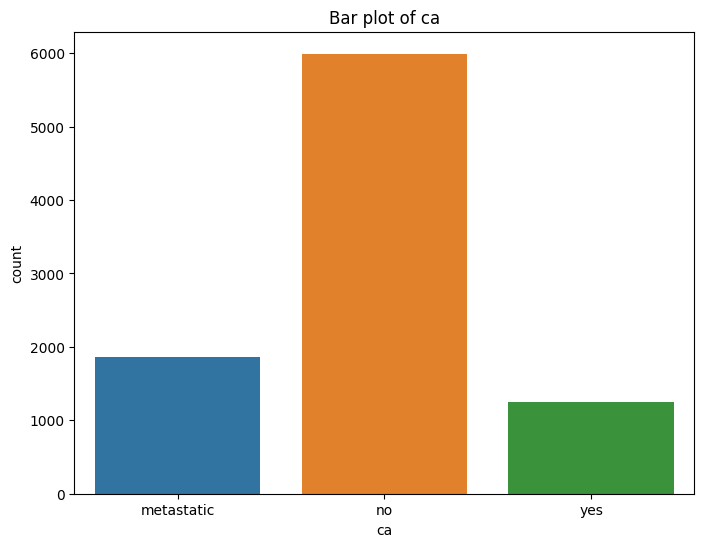

In [273]:
data_exploration(data, 'ca')
#Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).

## meanbp

Mean of meanbp: 84.53
Standard deviation of meanbp: 27.67
Number of outliers in meanbp: 0
Outliers values:
[]


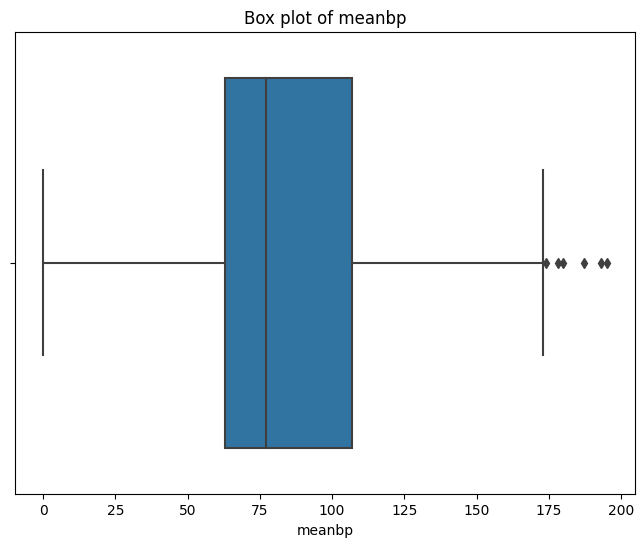

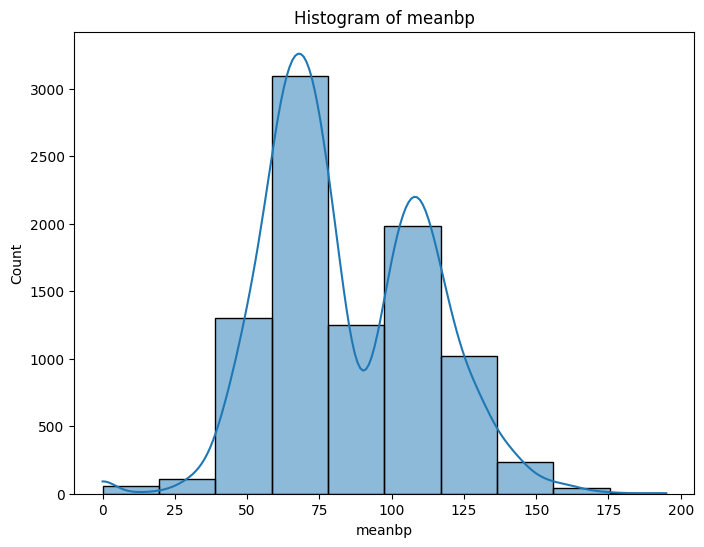

In [274]:
data_exploration(data, 'meanbp')
#drop one missing row 

## wblc

Mean of wblc: 12.35
Standard deviation of wblc: 9.27
Number of outliers in wblc: 122
Outliers values:
[ 51.1953125  65.         49.8984375  79.1875     50.59375   100.
  55.         41.5        44.796875   41.1953125  42.09375    40.796875
 112.1875    110.         44.         46.5        44.5       100.
  43.09375    67.296875   41.1953125  45.         99.         58.1953125
  80.59375    41.         93.890625   63.         42.09375    78.796875
  80.         55.59375   117.         61.296875   52.         42.8984375
  58.59375    44.09375   100.         50.09375    80.09375    60.09375
  42.3984375  50.         49.3984375  42.6953125  49.6953125  41.5
  46.5        57.796875   65.6875     68.5        43.09375    95.296875
  60.         51.3984375 100.         67.09375    78.1875     52.09375
  79.390625   45.5        71.890625   43.1953125  41.296875   46.8984375
  52.296875   46.296875  128.78125    45.8984375  55.8984375  48.5
  64.890625   63.5        41.09375    43.3984375  71.68

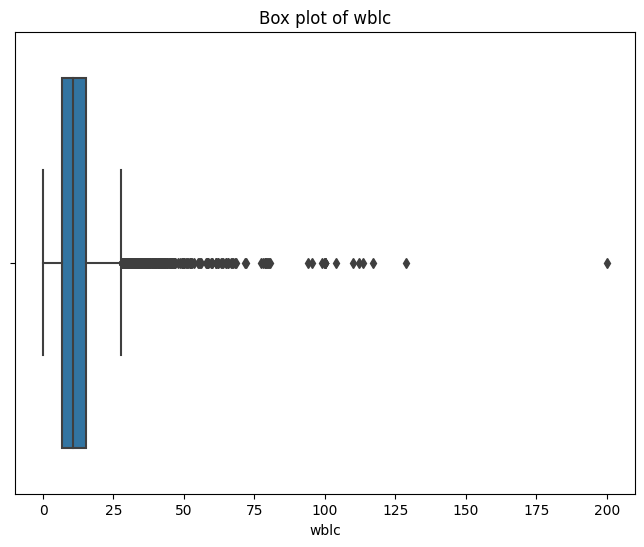

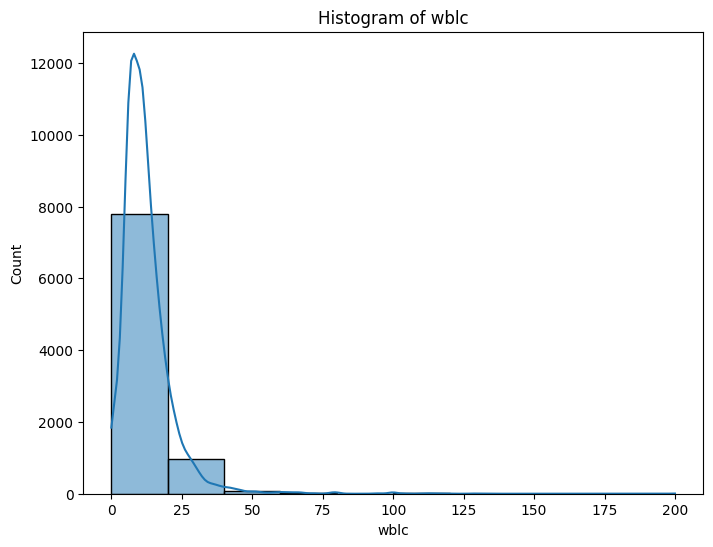

In [275]:
data_exploration(data, 'wblc')
#check normal values for imputation

In [276]:
data['wblc'] = data['wblc'].fillna(value=9)

## hrt

Mean of hrt: 97.15
Standard deviation of hrt: 31.56
Number of outliers in hrt: 1
Outliers values:
[300.]


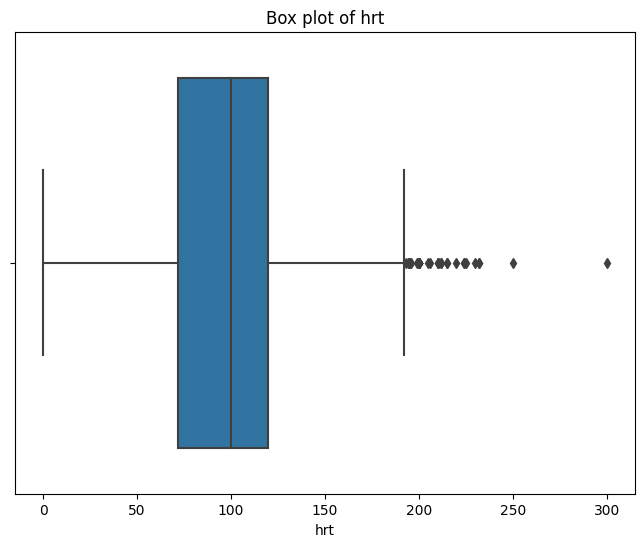

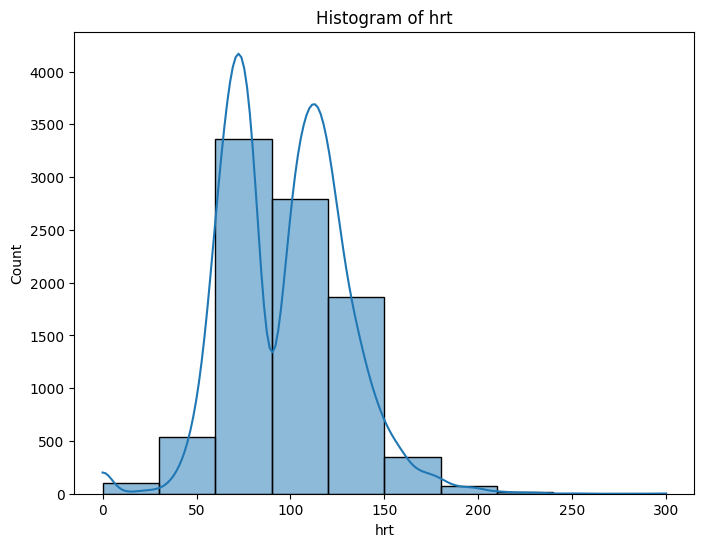

In [277]:
data_exploration(data, 'hrt')
#drop one missing value 

## resp

Mean of resp: 23.33
Standard deviation of resp: 9.58
Number of outliers in resp: 23
Outliers values:
[70. 60. 90. 60. 68. 60. 60. 75. 60. 60. 60. 67. 60. 60. 60. 72. 60. 60.
 60. 64. 76. 76. 60.]


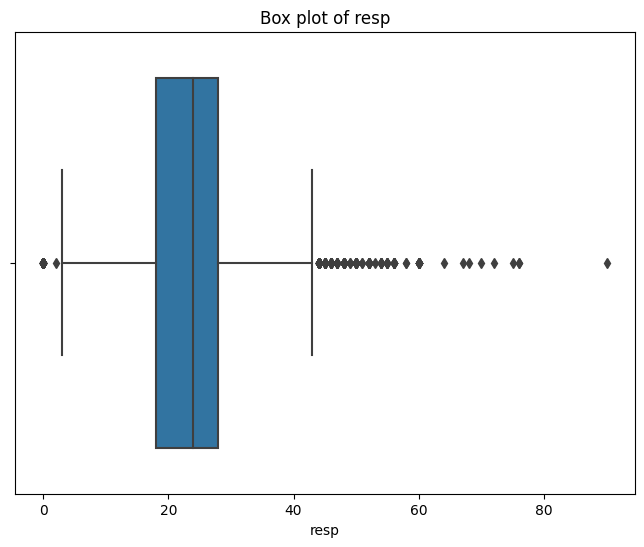

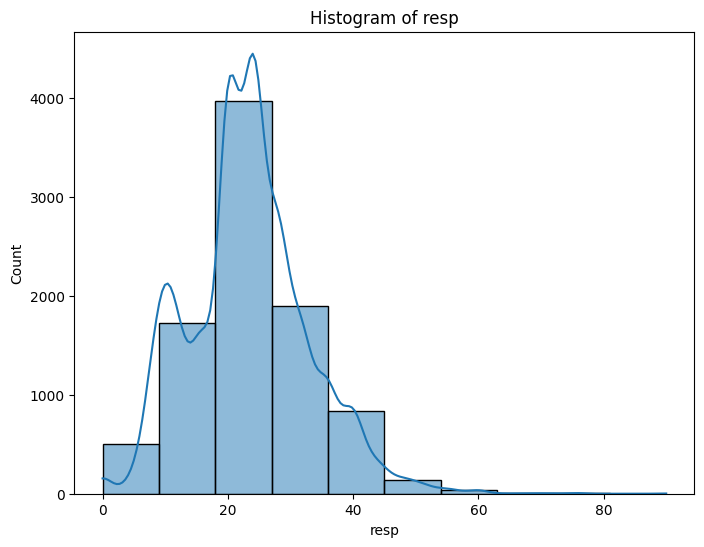

In [278]:
data_exploration(data, 'resp')
#drop one missin value

## temp

Mean of temp: 37.10
Standard deviation of temp: 1.25
Number of outliers in temp: 0
Outliers values:
[]


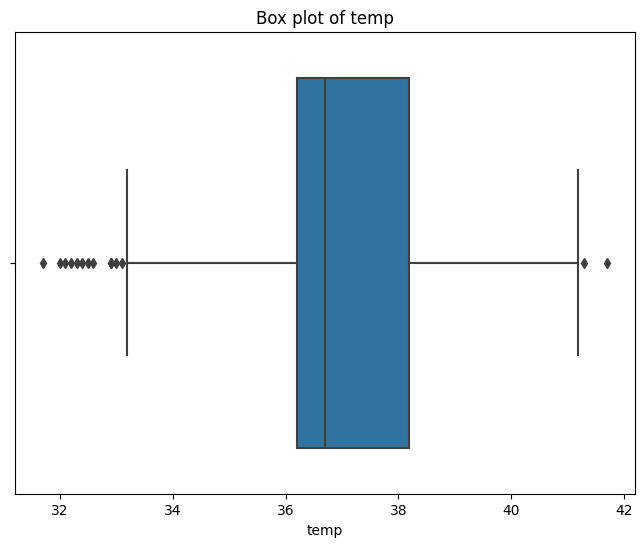

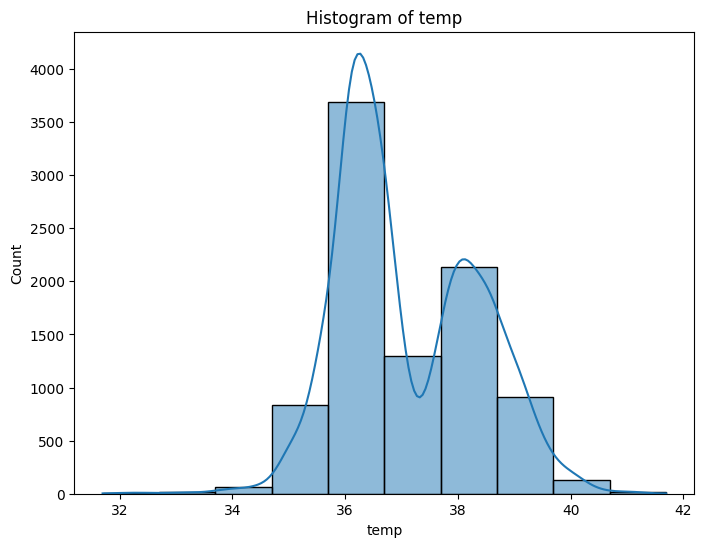

In [279]:
data_exploration(data, 'temp')
#drop one missing value

## pafi

Mean of pafi: 239.52
Standard deviation of pafi: 109.67
Number of outliers in pafi: 5
Outliers values:
[763.25  819.    869.375 890.375 795.125]


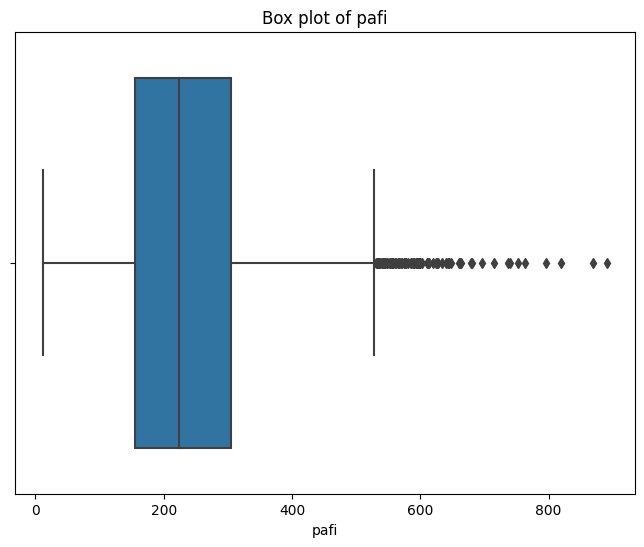

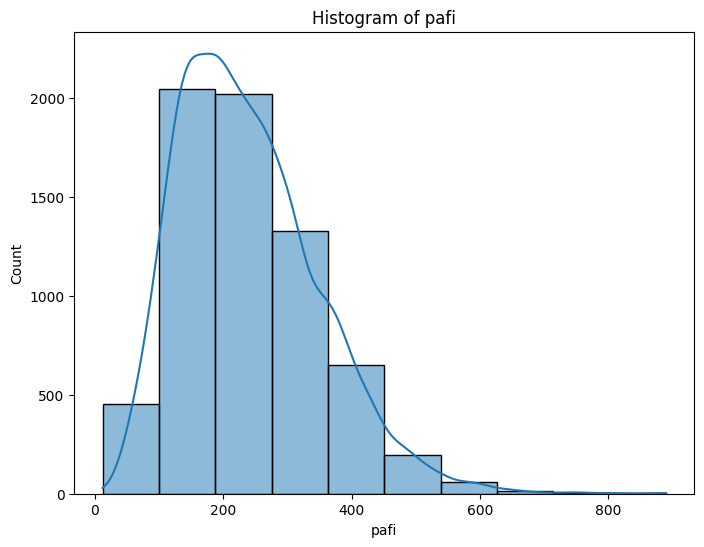

In [280]:
data_exploration(data, 'pafi')


In [281]:
#impute missing values with 333.3
data['pafi'] = data['pafi'].fillna(value=333.3)


## alb

Mean of alb: 2.95
Standard deviation of alb: 0.88
Number of outliers in alb: 3
Outliers values:
[29.         8.5996094 10.8984375]


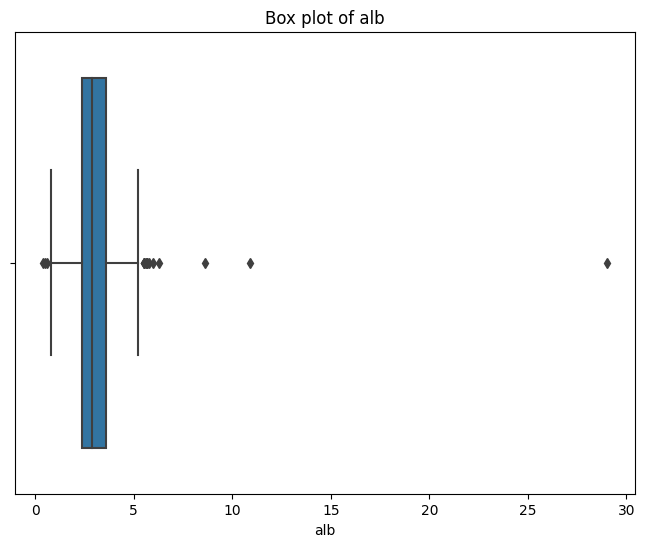

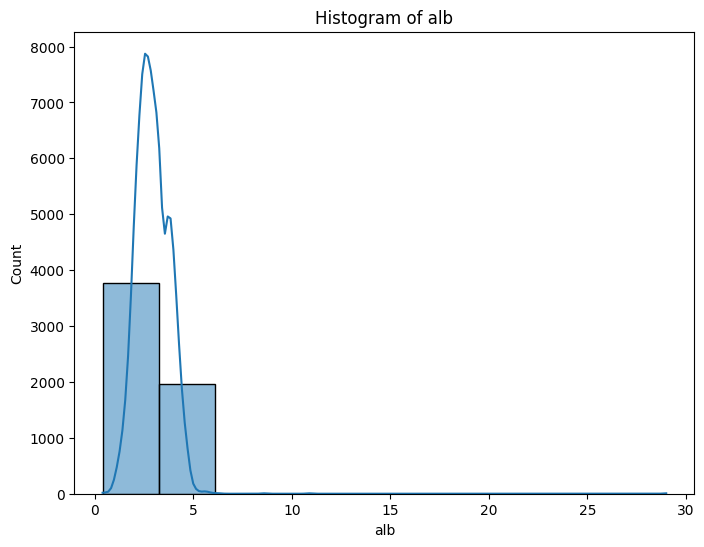

In [282]:
data_exploration(data, 'alb')


In [283]:
#impute mising values with 3.5
data['alb'] = data['alb'].fillna(value=3.5)

## bili

Mean of bili: 2.56
Standard deviation of bili: 5.32
Number of outliers in bili: 593
Outliers values:
[ 6.09960938 14.         12.7988281   6.79980469 23.5976562   7.
 31.3984375  13.0996094  13.          6.59960938 21.6992188  11.0996094
 31.         10.5        10.8984375   7.79980469 27.5        17.796875
 10.5        32.3984375   6.09960938  7.09960938  9.         10.1992188
  9.          7.69921875 16.796875   19.8984375  12.0996094  16.3984375
  7.5        16.8984375  38.3984375  54.296875   14.1992188  13.7988281
 10.5996094   6.09960938  6.19921875 35.         31.5976562  11.0996094
 23.1992188  11.6992188   9.59960938 16.296875    8.29882812 34.5
  8.3984375   9.8984375  44.3984375  51.296875    6.5        11.8984375
 35.6953125  13.6992188   7.5         8.          7.59960938 38.3984375
 12.5996094  19.796875    6.89941406  6.09960938 24.0976562  24.1992188
 11.5        21.         18.5976562   6.29980469  9.29882812  7.09960938
 18.5976562  10.1992188  19.296875    9.5       

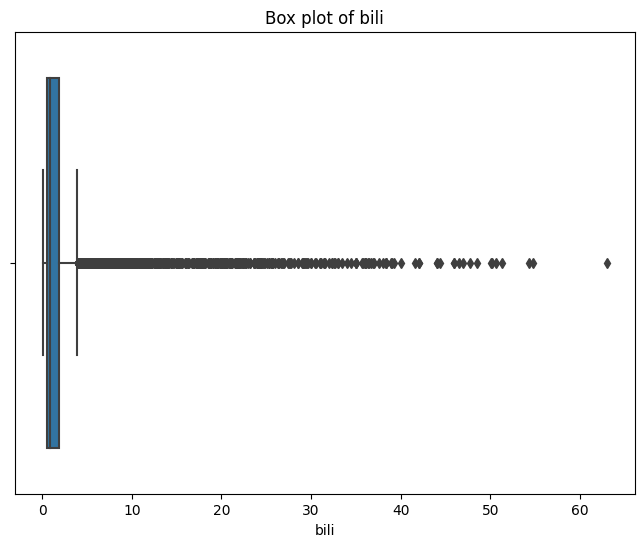

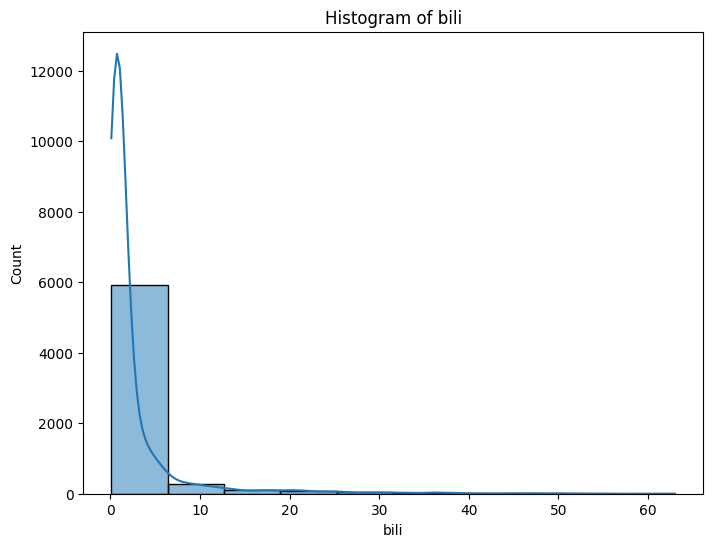

In [284]:
data_exploration(data, 'bili')


In [285]:
#impute missing values for bili with 1.01
data['bili'] = data['bili'].fillna(value=1.01)

## crea

Mean of crea: 1.77
Standard deviation of crea: 1.69
Number of outliers in crea: 537
Outliers values:
[ 5.5         6.          7.29980469  7.69921875  5.19921875  7.59960938
  5.79980469  8.59960938 10.6992188   5.69921875  5.39941406  5.69921875
  6.69921875  5.5         9.09960938 10.5         5.5         5.79980469
  5.5         5.79980469  5.69921875  7.39941406  7.69921875  5.09960938
  5.         12.          5.39941406  5.69921875  7.29980469  7.79980469
  7.09960938  5.59960938  8.79882812  7.29980469  5.39941406  5.
  8.8984375   6.5         9.09960938  5.89941406  5.09960938  8.19921875
  5.89941406  6.59960938  5.19921875  7.39941406  5.          7.79980469
 10.7988281   6.79980469  8.          6.19921875  5.19921875  5.59960938
  5.5         6.29980469  5.          5.          5.39941406  7.5
  6.79980469  5.5         9.3984375   6.09960938  6.89941406  7.29980469
  6.79980469  6.39941406  5.19921875 10.          6.39941406  6.69921875
  6.19921875  7.19921875  7.          

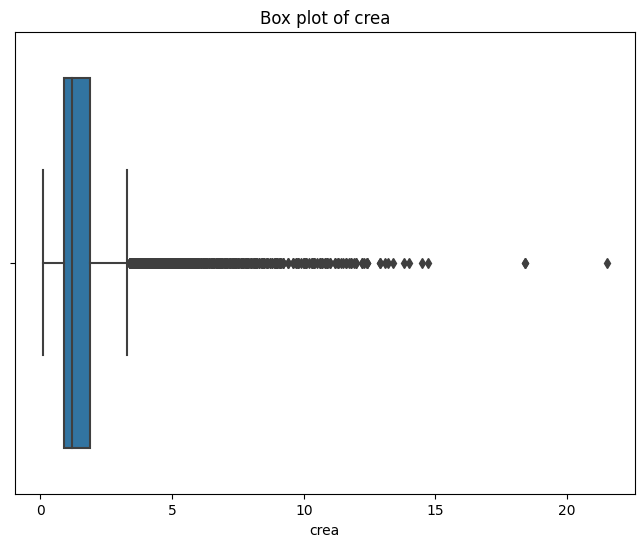

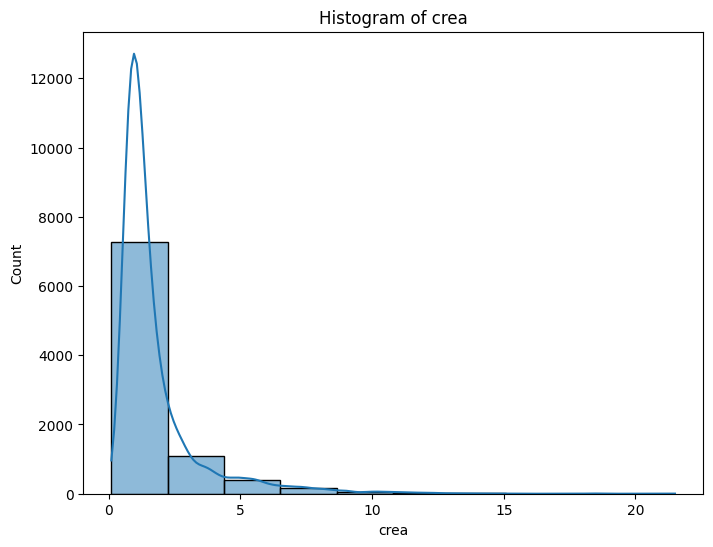

In [286]:
data_exploration(data, 'crea')
#normal values for imputation

In [287]:
data['crea'] = data['crea'].fillna(value=1.01)

## sod

Mean of sod: 137.57
Standard deviation of sod: 6.03
Number of outliers in sod: 16
Outliers values:
[111. 163. 168. 112. 163. 168. 175. 164. 164. 181. 166. 173. 112. 164.
 110. 165.]


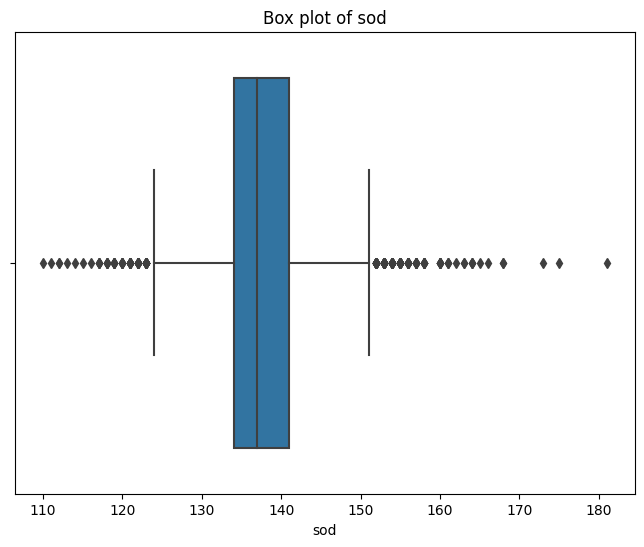

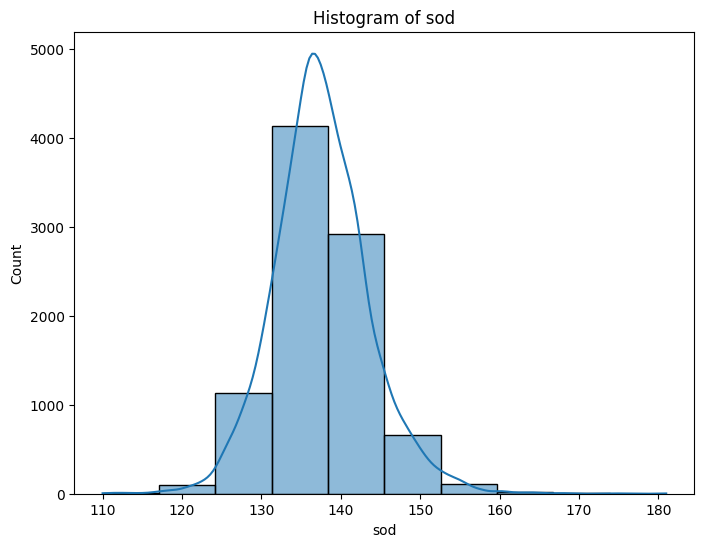

In [288]:
data_exploration(data, 'sod')
#drop one missing value 

## ph

Mean of ph: 7.42
Standard deviation of ph: 0.08
Number of outliers in ph: 37
Outliers values:
[7.069336 7.079102 7.069336 6.939453 7.089844 7.069336 7.089844 7.109375
 7.109375 6.959961 7.089844 6.959961 6.969727 7.089844 7.069336 7.109375
 7.099609 7.109375 7.069336 7.089844 6.90918  6.919922 7.05957  7.069336
 6.929688 6.989258 7.069336 6.969727 7.109375 7.069336 7.099609 7.019531
 7.029297 7.089844 7.05957  7.769531 6.829102]


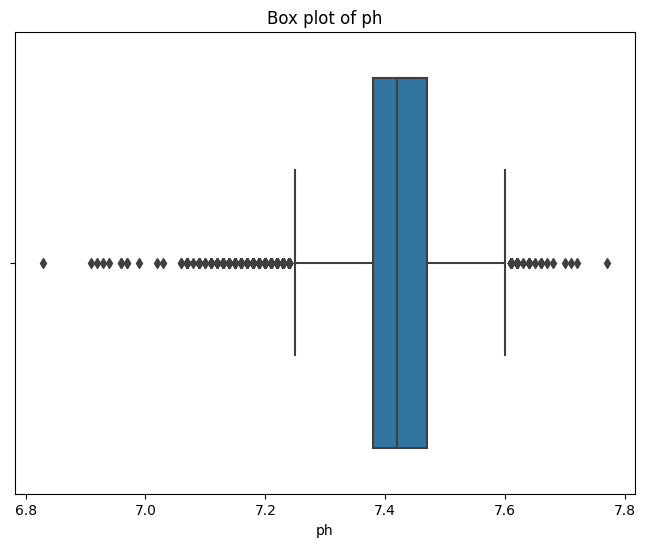

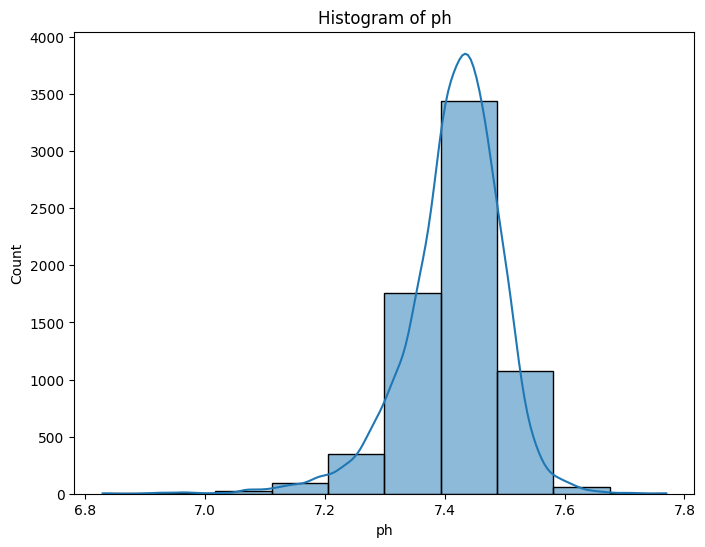

In [289]:
data_exploration(data, 'ph')
#

## glucose

Mean of glucose: 159.85
Standard deviation of glucose: 88.39
Number of outliers in glucose: 54
Outliers values:
[ 658.  841.  476.  508.  598.  584.  597.  617.  513.  462.  492.  648.
  468.  651.  502.  508.  719.  477.  547.  599.  943. 1092.  528.  537.
  498.  561.  668.  474.  520.  971.  687.  705.  536.  535.  507.  527.
  498.  446.  546.  512.  543.  661.  621.  611. 1051.  516.  551.  576.
  511.  478.  686.  463.  535.  446.]


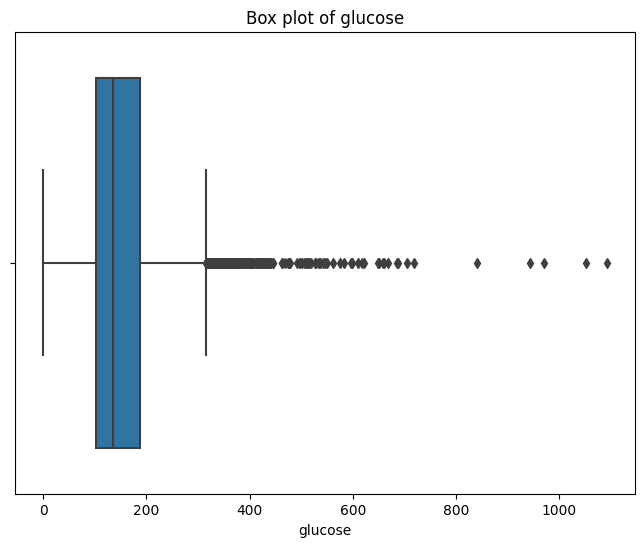

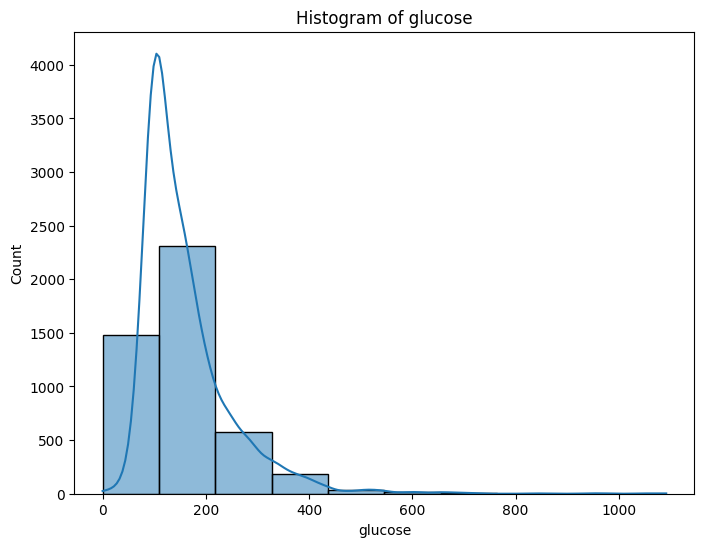

In [290]:
data_exploration(data, 'glucose')

## bun

Mean of bun: 32.34
Standard deviation of bun: 26.79
Number of outliers in bun: 44
Outliers values:
[150. 131. 147. 136. 166. 130. 170. 130. 139. 147. 178. 129. 127. 138.
 146. 300. 174. 137. 128. 144. 149. 135. 127. 132. 142. 129. 143. 192.
 134. 142. 133. 134. 136. 136. 147. 148. 158. 148. 154. 158. 130. 171.
 154. 132.]


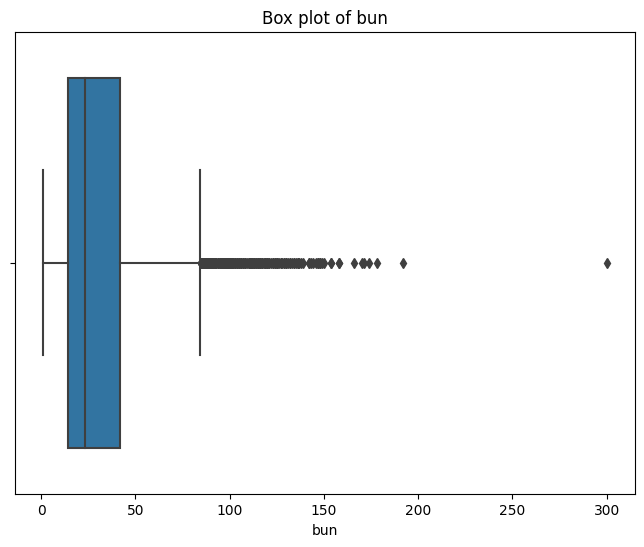

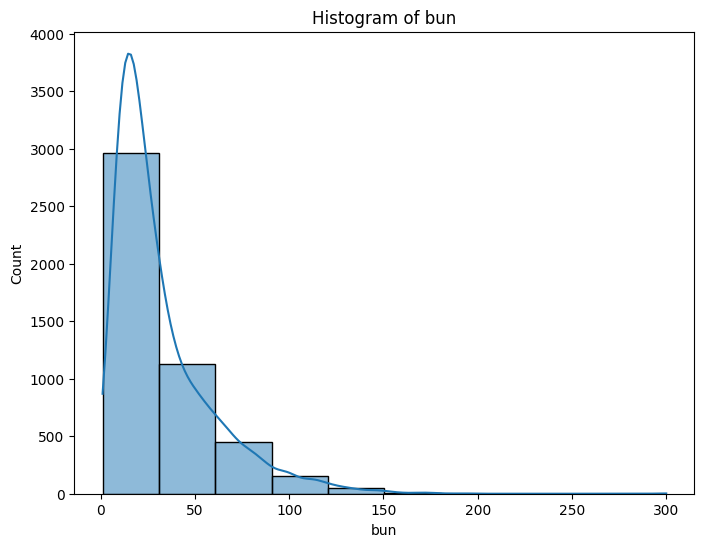

In [291]:
data_exploration(data, 'bun')
#normal values for impute

In [292]:
data['bun'] = data['bun'].fillna(value=6.51)

## urine

Mean of urine: 2191.32
Standard deviation of urine: 1455.34
Number of outliers in urine: 5
Outliers values:
[8550. 9000. 9000. 9000. 8600.]


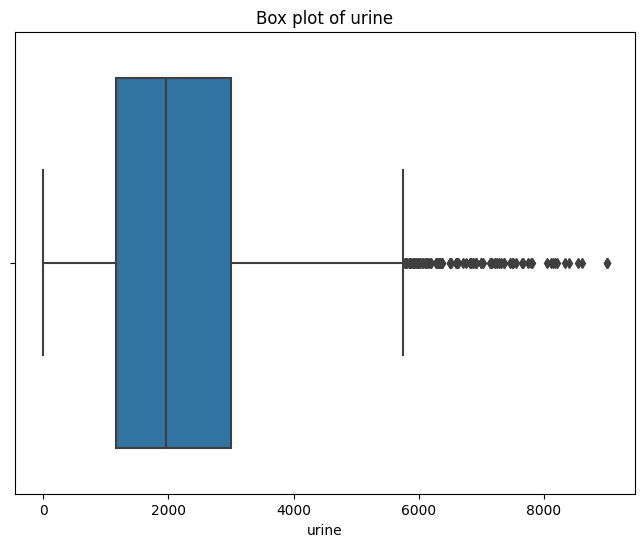

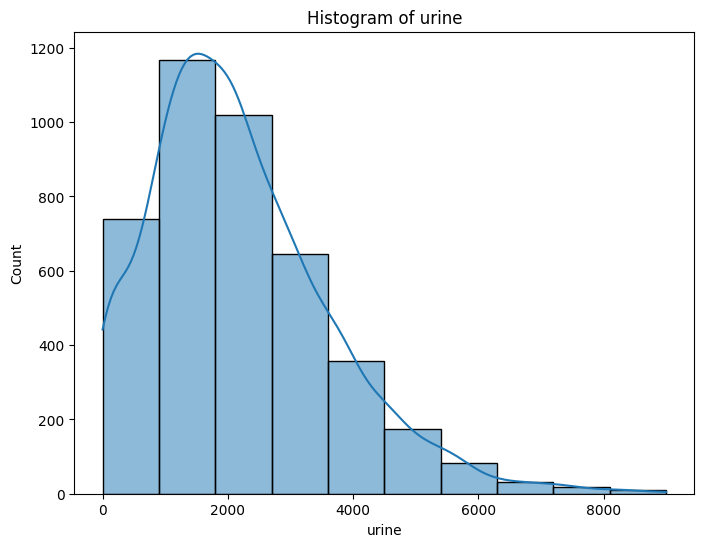

In [293]:
data_exploration(data, 'urine')
#normal values for impute

In [294]:
data['urine'] = data['urine'].fillna(value=2502)

## adlp

Counts and percentages of unique values in adlp:

      Count  Percentage
adlp                   
0.0    1848   53.364135
1.0     711   20.531331
2.0     332    9.587063
3.0     150    4.331504
5.0     149    4.302628
4.0     124    3.580710
6.0      98    2.829916
7.0      51    1.472712


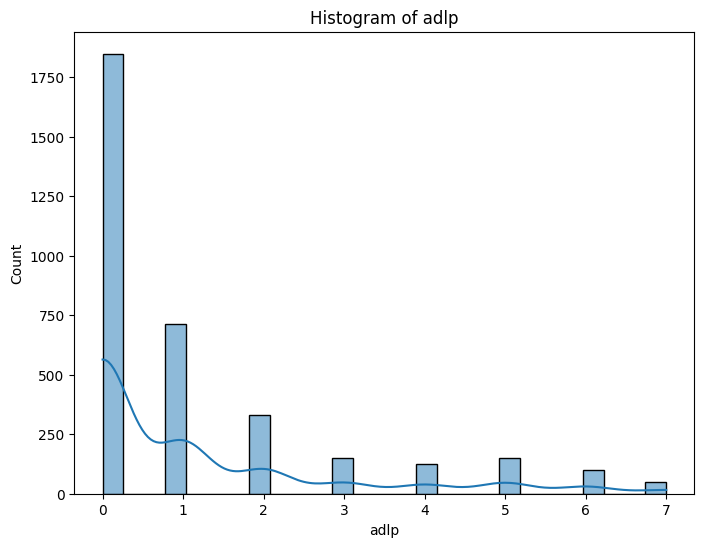

In [295]:
data_exploration(data, 'adlp')

## adls

Counts and percentages of unique values in adls:

      Count  Percentage
adls                   
0.0    3106   49.815557
1.0    1031   16.535686
2.0     469    7.522053
6.0     403    6.463512
5.0     343    5.501203
3.0     327    5.244587
7.0     300    4.811548
4.0     256    4.105854


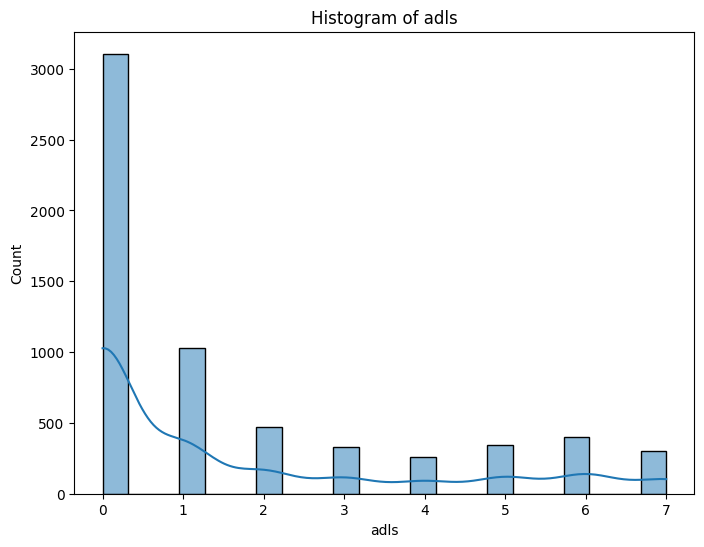

In [296]:
data_exploration(data, 'adls')

## sfdm2

Counts and percentages of unique values in sfdm2:

                     Count  Percentage
sfdm2                                 
<2 mo. follow-up      3119   40.501234
no(M2 and SIP pres)   3061   39.748085
adl>=4 (>=5 if sur)    916   11.894559
SIP>=30                564    7.323724
Coma or Intub           41    0.532398


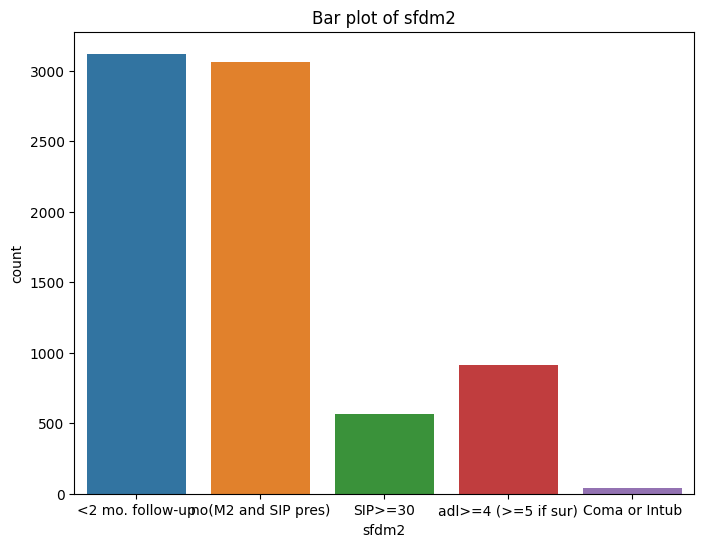

In [297]:
data_exploration(data, 'sfdm2')
#chcek section for more

## adlsc

Mean of adlsc: 1.89
Standard deviation of adlsc: 2.00
Number of outliers in adlsc: 0
Outliers values:
[]


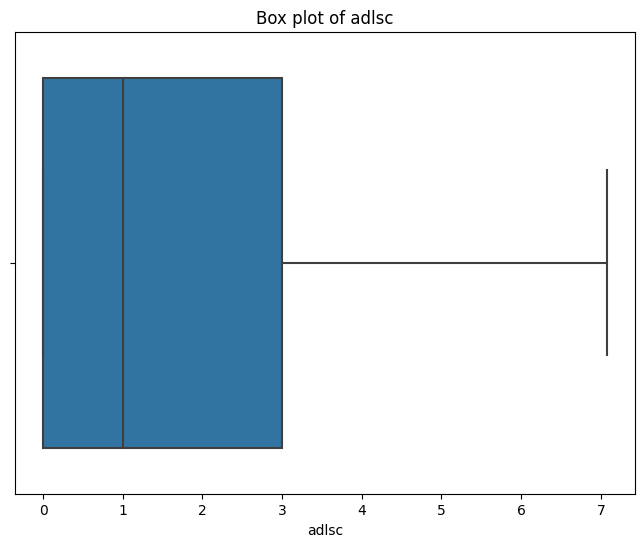

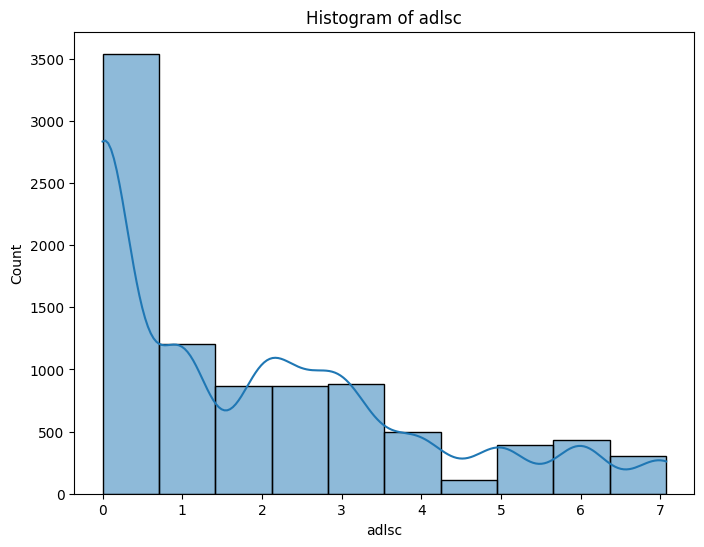

In [298]:
data_exploration(data, 'adlsc')